# Machine Learning and Neural Networks Midterm CM3015

This dataset (originally from the Spotify API but downloaded from Kaggle) can be accessed [here](https://www.kaggle.com/datasets/jarredpriester/taylor-swift-spotify-dataset/data?select=taylor_swift_spotify.csv).

In [1]:
# Using pandas to pre-process and load the dataset
import pandas as pd
# Use this to create own classifier
import numpy as np
# Visualization lib
import matplotlib.pyplot as plt
# seaborn for colored and high-level plotting
import seaborn as sns
%matplotlib inline

## Overview and Visualization of Dataset

In [2]:
df = pd.read_csv('taylor_swift_spotify.csv')
print(f"Data shape: {df.shape}")
# Get an overview of the dataset
df.head(10)

Data shape: (530, 18)


Unnamed: 0                                           name  \
0           0         Welcome To New York (Taylor's Version)   
1           1                 Blank Space (Taylor's Version)   
2           2                       Style (Taylor's Version)   
3           3            Out Of The Woods (Taylor's Version)   
4           4  All You Had To Do Was Stay (Taylor's Version)   
5           5                Shake It Off (Taylor's Version)   
6           6            I Wish You Would (Taylor's Version)   
7           7                   Bad Blood (Taylor's Version)   
8           8              Wildest Dreams (Taylor's Version)   
9           9        How You Get The Girl (Taylor's Version)   

                              album release_date  track_number  \
0  1989 (Taylor's Version) [Deluxe]   27/10/2023             1   
1  1989 (Taylor's Version) [Deluxe]   27/10/2023             2   
2  1989 (Taylor's Version) [Deluxe]   27/10/2023             3   
3  1989 (Taylor's Version) [Deluxe]   27/10/2023             4   
4  1989 (Taylor's Version) [Deluxe]   27/10/2023             5   
5  1989 (Taylor's Version) [Deluxe]   27/10/2023             6   
6  1989 (Taylor's Version) [Deluxe]   27/10/2023             7   
7  1989 (Taylor's Version) [Deluxe]   27/10/2023             8   
8  1989 (Taylor's Version) [Deluxe]   27/10/2023             9   
9  1989 (Taylor's Version) [Deluxe]   27/10/2023            10   

                       id                                   uri  acousticness  \
0  4WUepByoeqcedHoYhSNHRt  spotify:track:4WUepByoeqcedHoYhSNHRt      0.009420   
1  0108kcWLnn2HlH2kedi1gn  spotify:track:0108kcWLnn2HlH2kedi1gn      0.088500   
2  3Vpk1hfMAQme8VJ0SNRSkd  spotify:track:3Vpk1hfMAQme8VJ0SNRSkd      0.000421   
3  1OcSfkeCg9hRC2sFKB4IMJ  spotify:track:1OcSfkeCg9hRC2sFKB4IMJ      0.000537   
4  2k0ZEeAqzvYMcx9Qt5aClQ  spotify:track:2k0ZEeAqzvYMcx9Qt5aClQ      0.000656   
5  50yNTF0Od55qnHLxYsA5Pw  spotify:track:50yNTF0Od55qnHLxYsA5Pw      0.012100   
6  3FxJDucHWdw6caWTKO5b23  spotify:track:3FxJDucHWdw6caWTKO5b23      0.003540   
7  7oZONwFiFIErZcXAtTu7FY  spotify:track:7oZONwFiFIErZcXAtTu7FY      0.036200   
8  27exgla7YBw9DUNNcTIpjy  spotify:track:27exgla7YBw9DUNNcTIpjy      0.043600   
9  733OhaXQIHY7BKtY3vnSkn  spotify:track:733OhaXQIHY7BKtY3vnSkn      0.001960   

   danceability  energy  instrumentalness  liveness  loudness  speechiness  \
0         0.757   0.610          0.000037    0.3670    -4.840       0.0327   
1         0.733   0.733          0.000000    0.1680    -5.376       0.0670   
2         0.511   0.822          0.019700    0.0899    -4.785       0.0397   
3         0.545   0.885          0.000056    0.3850    -5.968       0.0447   
4         0.588   0.721          0.000000    0.1310    -5.579       0.0317   
5         0.636   0.808          0.000022    0.3590    -5.693       0.0729   
6         0.670   0.858          0.000013    0.0687    -6.528       0.0439   
7         0.618   0.683          0.000000    0.3050    -6.438       0.1940   
8         0.589   0.674          0.000072    0.1120    -7.480       0.0656   
9         0.758   0.691          0.000011    0.0939    -5.798       0.0515   

     tempo  valence  popularity  duration_ms  
0  116.998    0.685          79       212600  
1   96.057    0.701          79       231833  
2   94.868    0.305          80       231000  
3   92.021    0.206          79       235800  
4   96.997    0.520          78       193289  
5  160.058    0.917          77       219209  
6  118.009    0.539          77       207650  
7  169.971    0.363          77       211103  
8  139.985    0.514          77       220433  
9  119.997    0.538          77       247533

The main problem with this dataset with respect to the aim of this project is that there are multiple re-releases of the same album. For instance, here we can see all of the albums which are a very similar version of the '1989' album:

In [3]:
# As we can see here, there are 75 rows/songs which belong to an album which contains the name '1989'
print(f"Nr of songs in an album which is some version of 1989: {len(df[df['album'].str.contains('1989')])}")
# And the unique list of album names which are some version of '1989' --> there are three albums with very similar songs on them.
print(f"Versions of album '1989': {df[df['album'].str.contains('1989')]['album'].unique()}")

Nr of songs in an album which is some version of 1989: 75
Versions of album '1989': ["1989 (Taylor's Version) [Deluxe]" "1989 (Taylor's Version)"
 '1989 (Deluxe Edition)' '1989']


It is easy to imagine how having multiple re-releases of the same album but only one version of another particular album could make it difficult for the classifier to differentate between different albums, if they contain the same songs with very slight musical differences between them. 

Furthermore, this can lead to high variance and overfitting, because the algorithm might pick out patterns which represent the very slight differences between the different releases of the same album, rather than learning more general patterns focused on distinctions between albums.

One solution to this problem is to rename the different versions of the same album all so they have the same title. However, this will create an imbalance in the training data, as some albums (which have been re-released several times) will be over-represented, whereas some albums which have not had a special release yet, such as the debut 'Taylor Swift' album will be under-represented. 

Consequently, applying techniques such as nested cross-validation on folds with randomly-selected indices is really essential here to ensure that the least-represented classes get trained on. It will therefore be interesting to compare different classification models (K-Nearest Neighbour, Naive Bayes and Decision Trees) to see which performs best on imbalanced data. 


In [4]:
# Set all albums which are a version of the same album to have the same 'album' name in the DataFrame, using the 'replace' method
# First get list of distinct album names
albums = df['album'].unique() 
albums

array(["1989 (Taylor's Version) [Deluxe]", "1989 (Taylor's Version)",
       "Speak Now (Taylor's Version)", 'Midnights (The Til Dawn Edition)',
       'Midnights (3am Edition)', 'Midnights', "Red (Taylor's Version)",
       "Fearless (Taylor's Version)", 'evermore (deluxe version)',
       'evermore',
       'folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]',
       'folklore (deluxe version)', 'folklore', 'Lover', 'reputation',
       'reputation Stadium Tour Surprise Song Playlist',
       '1989 (Deluxe Edition)', '1989', 'Red (Deluxe Edition)', 'Red',
       'Speak Now World Tour Live', 'Speak Now (Deluxe Edition)',
       'Speak Now', 'Fearless Platinum Edition', 'Fearless',
       'Live From Clear Channel Stripped 2008', 'Taylor Swift'],
      dtype=object)

In [5]:
# 1. Replace all 1989 versions with only '1989'
# Boolean mask: get true-false array depending on whether 'album' contains sub-string '1989'
mask1 = df['album'].str.contains('1989') 
df.loc[mask1, 'album'] = '1989'

In [6]:
# 2. Do this for the other albums with duplicated versions
mask2 = df['album'].str.contains('Midnights')
df.loc[mask2, 'album'] = 'Midnights'
mask3 = df['album'].str.contains('Red')
df.loc[mask3, 'album'] = 'Red'
mask4 = df['album'].str.contains('Speak Now')
df.loc[mask4, 'album'] = 'Speak Now'
mask5 = df['album'].str.contains('folklore')
df.loc[mask5, 'album'] = 'folklore'
mask6 = df['album'].str.contains('Fearless')
df.loc[mask6, 'album'] = 'Fearless'
mask7 = df['album'].str.contains('reputation')
df.loc[mask7, 'album'] = 'reputation'
mask8 = df['album'].str.contains('evermore')
df.loc[mask8, 'album'] = 'evermore'

In [15]:
# Now compare the album names: much simpler!
df['album'].unique() 

array(['1989', 'Speak Now', 'Midnights', 'Red', 'Fearless', 'evermore',
       'folklore', 'Lover', 'reputation',
       'Live From Clear Channel Stripped 2008', 'Taylor Swift'],
      dtype=object)

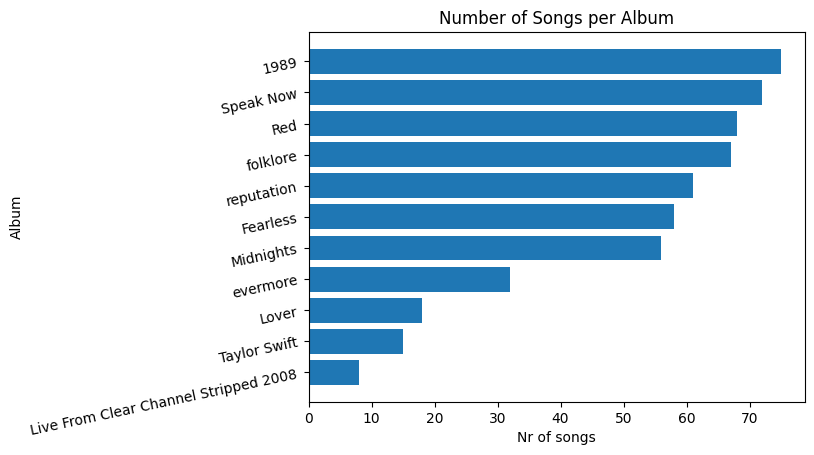

In [16]:
# Print out how many songs in each album
# It is clear that evermore and Taylor Swift debut album are underrepresented
# 'Live From Clear Channel Stripped 2008' is a compilation of songs from different albums, so it doesn't overrepresent one particular album
album_song_counts = df.groupby('album').size().reset_index(name='nr of songs').sort_values(by='nr of songs')
# Create a horizontal bar chart using matplotlib with albums on y-axis and song counts on the x-axis
plt.barh(album_song_counts['album'], album_song_counts['nr of songs'])
# Add axes labels
plt.ylabel('Album')
plt.xlabel('Nr of songs')
plt.title('Number of Songs per Album')
# Rotate the labels on the y-axis (Albums) so easier to read them
plt.yticks(rotation=12)
plt.show()

In [9]:
df.to_csv('taylor_swift_processed.csv', index=False)

In [7]:
df = pd.read_csv('taylor_swift_processed.csv')
df

Unnamed: 0                                           name         album  \
0             0         Welcome To New York (Taylor's Version)          1989   
1             1                 Blank Space (Taylor's Version)          1989   
2             2                       Style (Taylor's Version)          1989   
3             3            Out Of The Woods (Taylor's Version)          1989   
4             4  All You Had To Do Was Stay (Taylor's Version)          1989   
..          ...                                            ...           ...   
525         525                                       Our Song  Taylor Swift   
526         526                  I'm Only Me When I'm With You  Taylor Swift   
527         527                                      Invisible  Taylor Swift   
528         528                         A Perfectly Good Heart  Taylor Swift   
529         529           Teardrops on My Guitar - Pop Version  Taylor Swift   

    release_date  track_number                      id  \
0     27/10/2023             1  4WUepByoeqcedHoYhSNHRt   
1     27/10/2023             2  0108kcWLnn2HlH2kedi1gn   
2     27/10/2023             3  3Vpk1hfMAQme8VJ0SNRSkd   
3     27/10/2023             4  1OcSfkeCg9hRC2sFKB4IMJ   
4     27/10/2023             5  2k0ZEeAqzvYMcx9Qt5aClQ   
..           ...           ...                     ...   
525   24/10/2006            11  15DeqWWQB4dcEWzJg15VrN   
526   24/10/2006            12  0JIdBrXGSJXS72zjF9ss9u   
527   24/10/2006            13  5OOd01o2YS1QFwdpVLds3r   
528   24/10/2006            14  1spLfUJxtyVyiKKTegQ2r4   
529   24/10/2006            15  4pJi1rVt9GNegU9kywjg4z   

                                      uri  acousticness  danceability  energy  \
0    spotify:track:4WUepByoeqcedHoYhSNHRt      0.009420         0.757   0.610   
1    spotify:track:0108kcWLnn2HlH2kedi1gn      0.088500         0.733   0.733   
2    spotify:track:3Vpk1hfMAQme8VJ0SNRSkd      0.000421         0.511   0.822   
3    spotify:track:1OcSfkeCg9hRC2sFKB4IMJ      0.000537         0.545   0.885   
4    spotify:track:2k0ZEeAqzvYMcx9Qt5aClQ      0.000656         0.588   0.721   
..                                    ...           ...           ...     ...   
525  spotify:track:15DeqWWQB4dcEWzJg15VrN      0.111000         0.668   0.672   
526  spotify:track:0JIdBrXGSJXS72zjF9ss9u      0.004520         0.563   0.934   
527  spotify:track:5OOd01o2YS1QFwdpVLds3r      0.637000         0.612   0.394   
528  spotify:track:1spLfUJxtyVyiKKTegQ2r4      0.003490         0.483   0.751   
529  spotify:track:4pJi1rVt9GNegU9kywjg4z      0.040200         0.459   0.753   

     instrumentalness  liveness  loudness  speechiness    tempo  valence  \
0            0.000037    0.3670    -4.840       0.0327  116.998    0.685   
1            0.000000    0.1680    -5.376       0.0670   96.057    0.701   
2            0.019700    0.0899    -4.785       0.0397   94.868    0.305   
3            0.000056    0.3850    -5.968       0.0447   92.021    0.206   
4            0.000000    0.1310    -5.579       0.0317   96.997    0.520   
..                ...       ...       ...          ...      ...      ...   
525          0.000000    0.3290    -4.931       0.0303   89.011    0.539   
526          0.000807    0.1030    -3.629       0.0646  143.964    0.518   
527          0.000000    0.1470    -5.723       0.0243   96.001    0.233   
528          0.000000    0.1280    -5.726       0.0365  156.092    0.268   
529          0.000000    0.0863    -3.827       0.0537  199.997    0.483   

     popularity  duration_ms  
0            79       212600  
1            79       231833  
2            80       231000  
3            79       235800  
4            78       193289  
..          ...          ...  
525          76       201106  
526          61       213053  
527          58       203226  
528          56       220146  
529          57       179066  

[530 rows x 18 columns]

In [8]:
# Extract musical/audio feature names from the dataset
feature_names = df.columns[7:16]

C:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


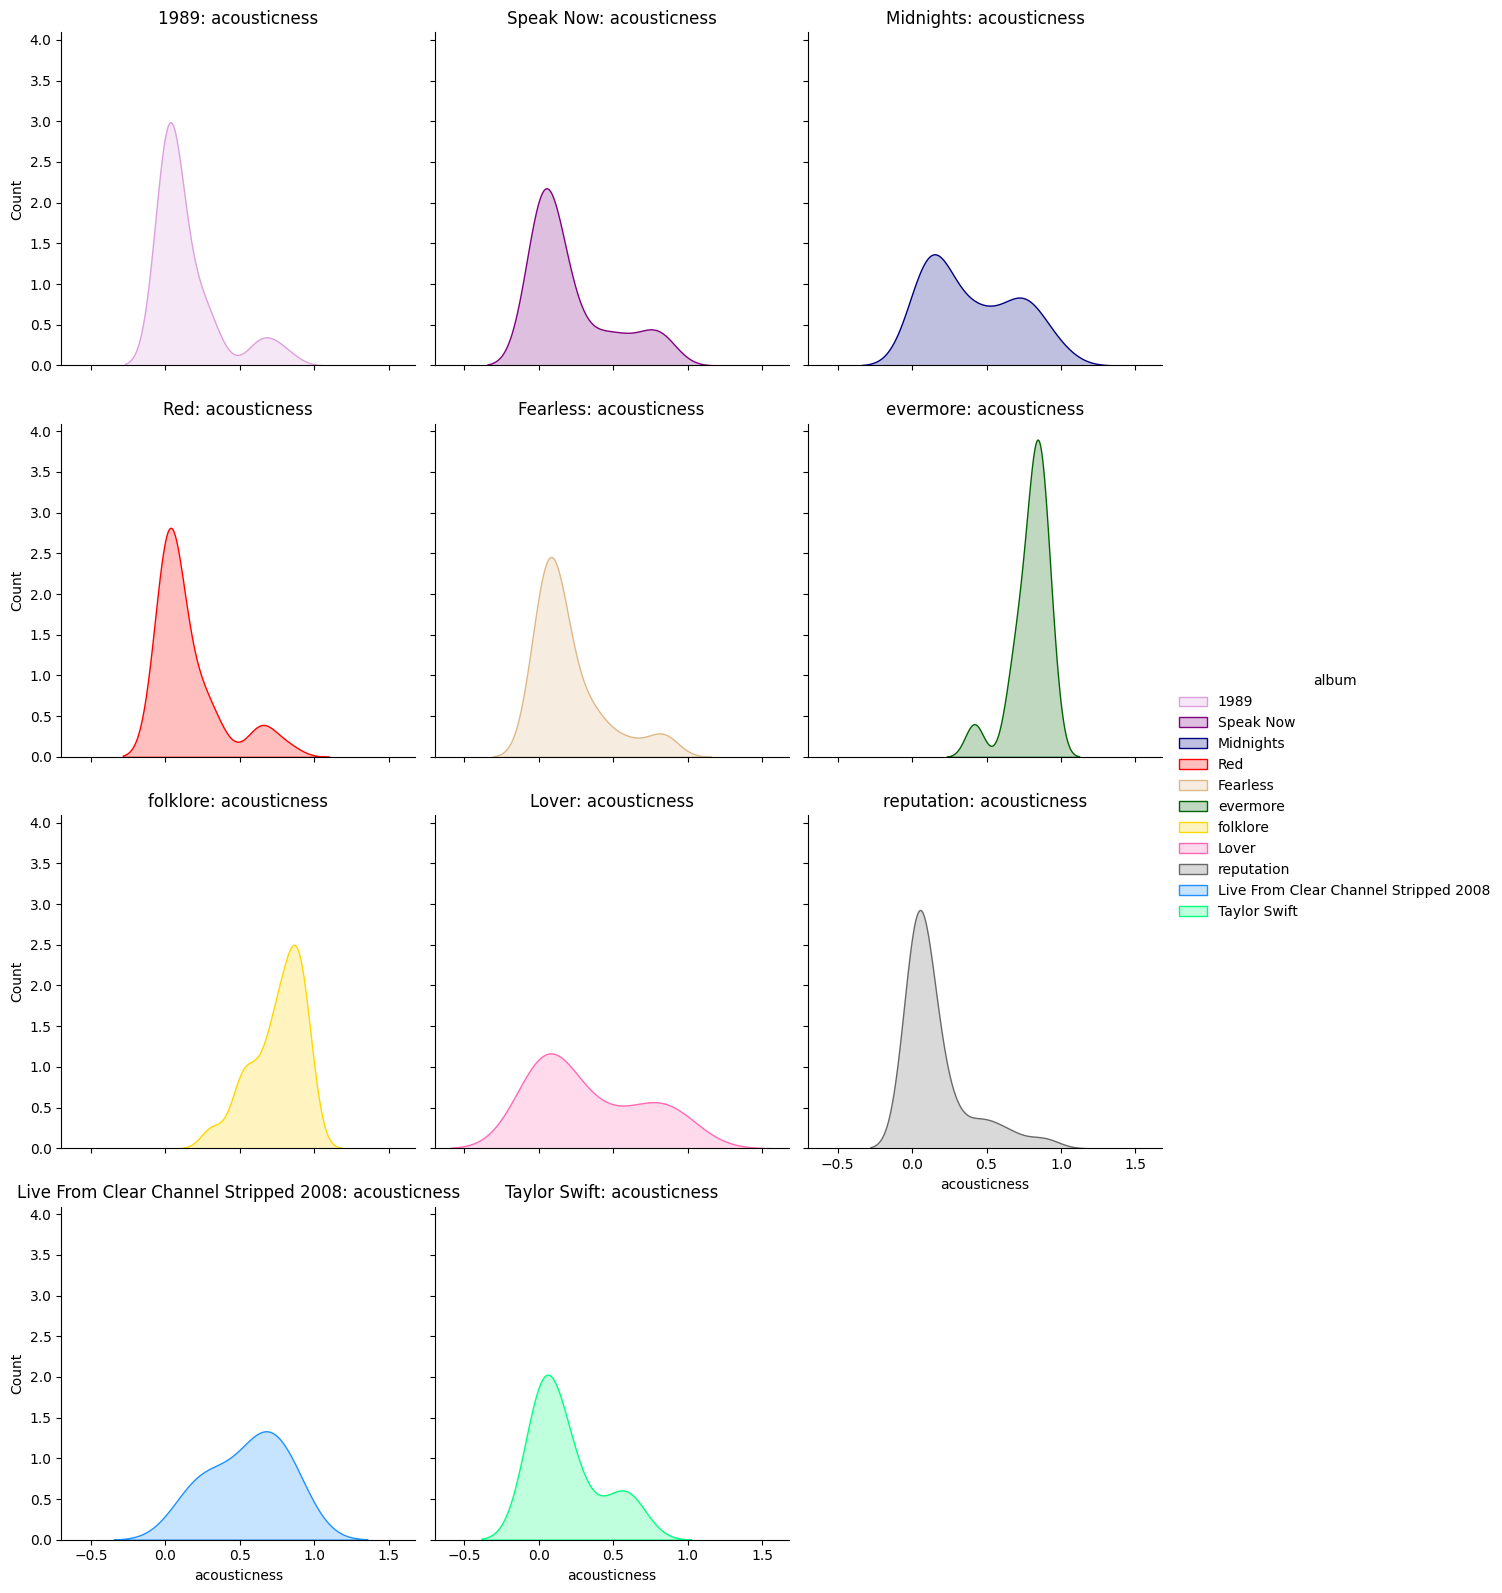

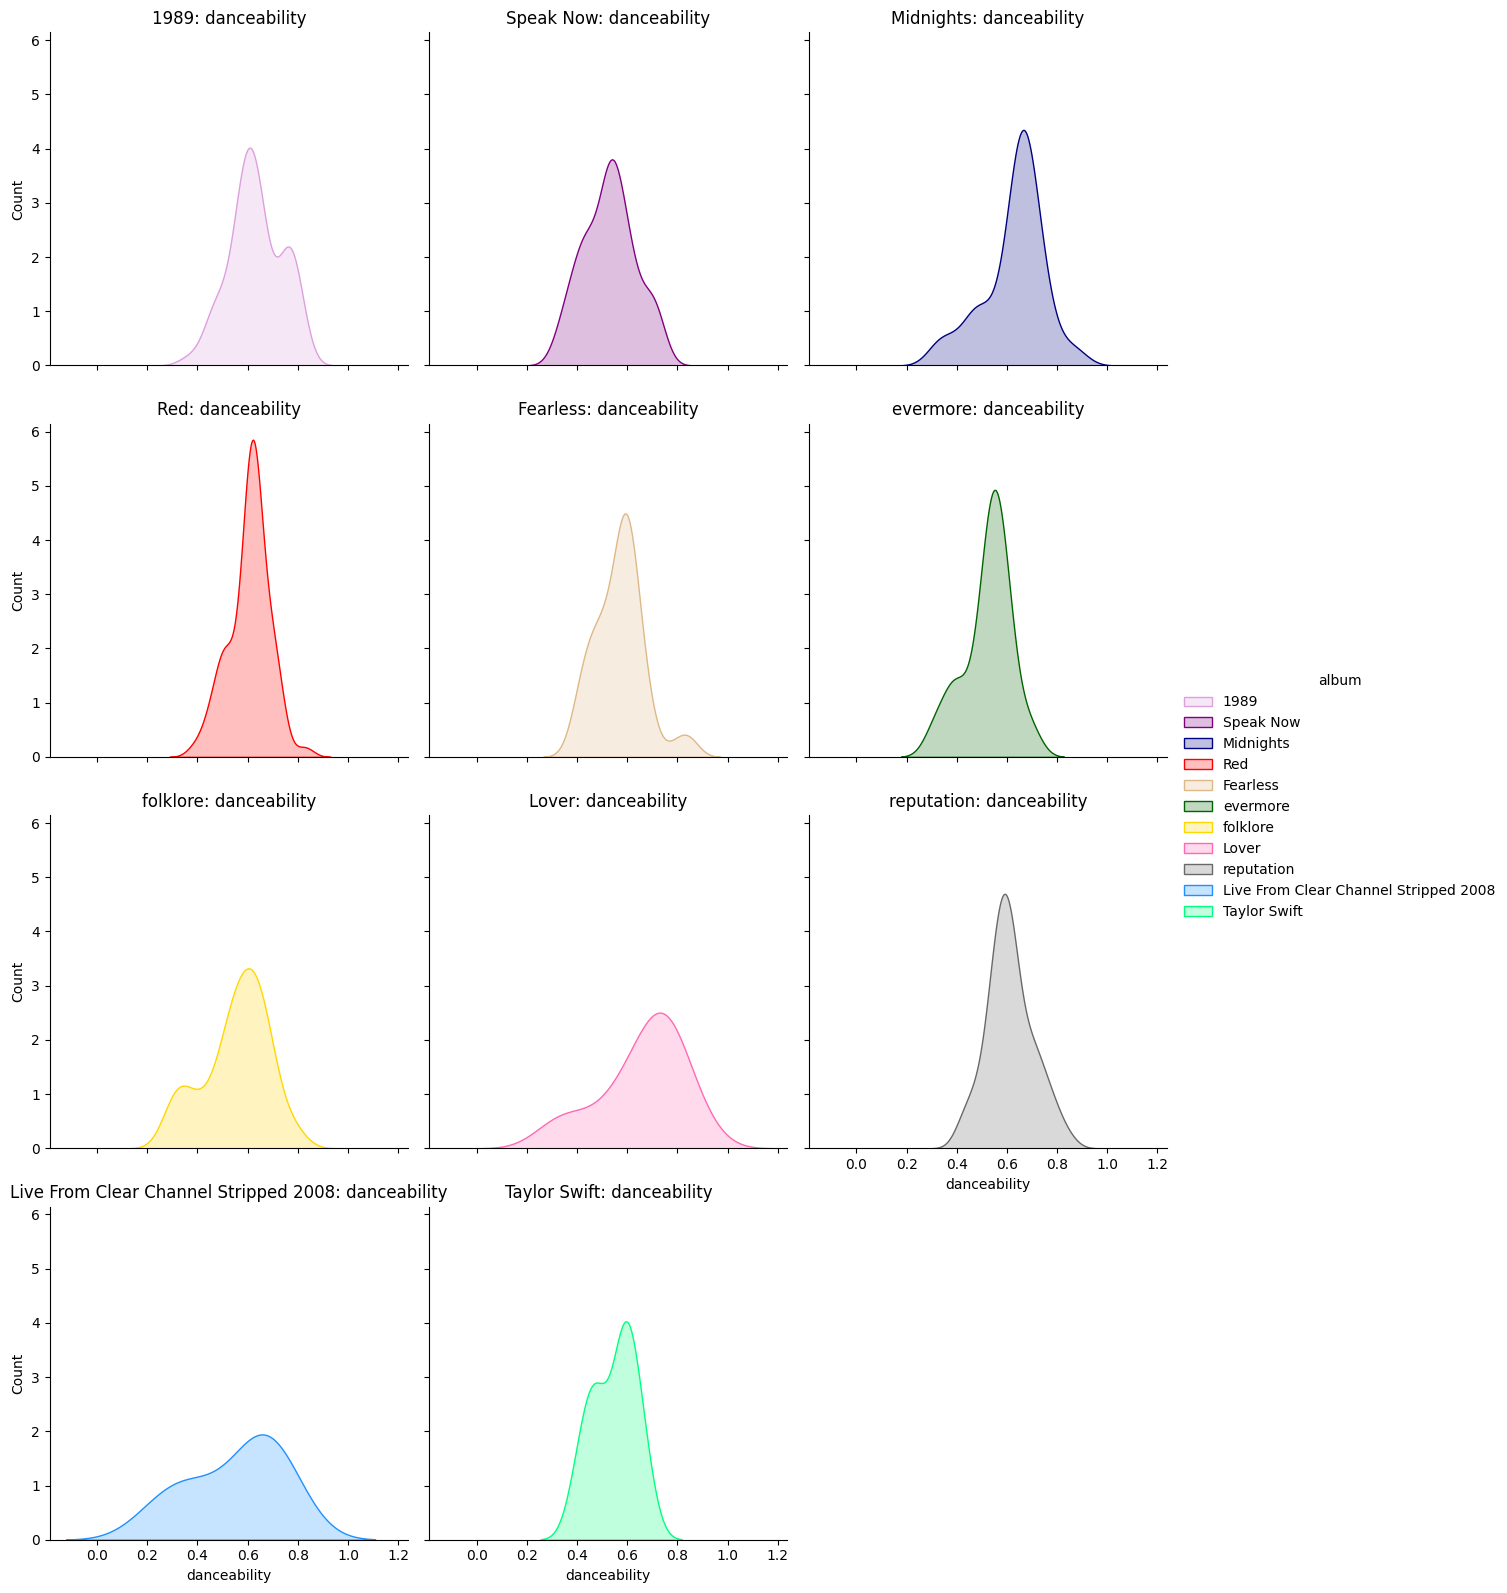

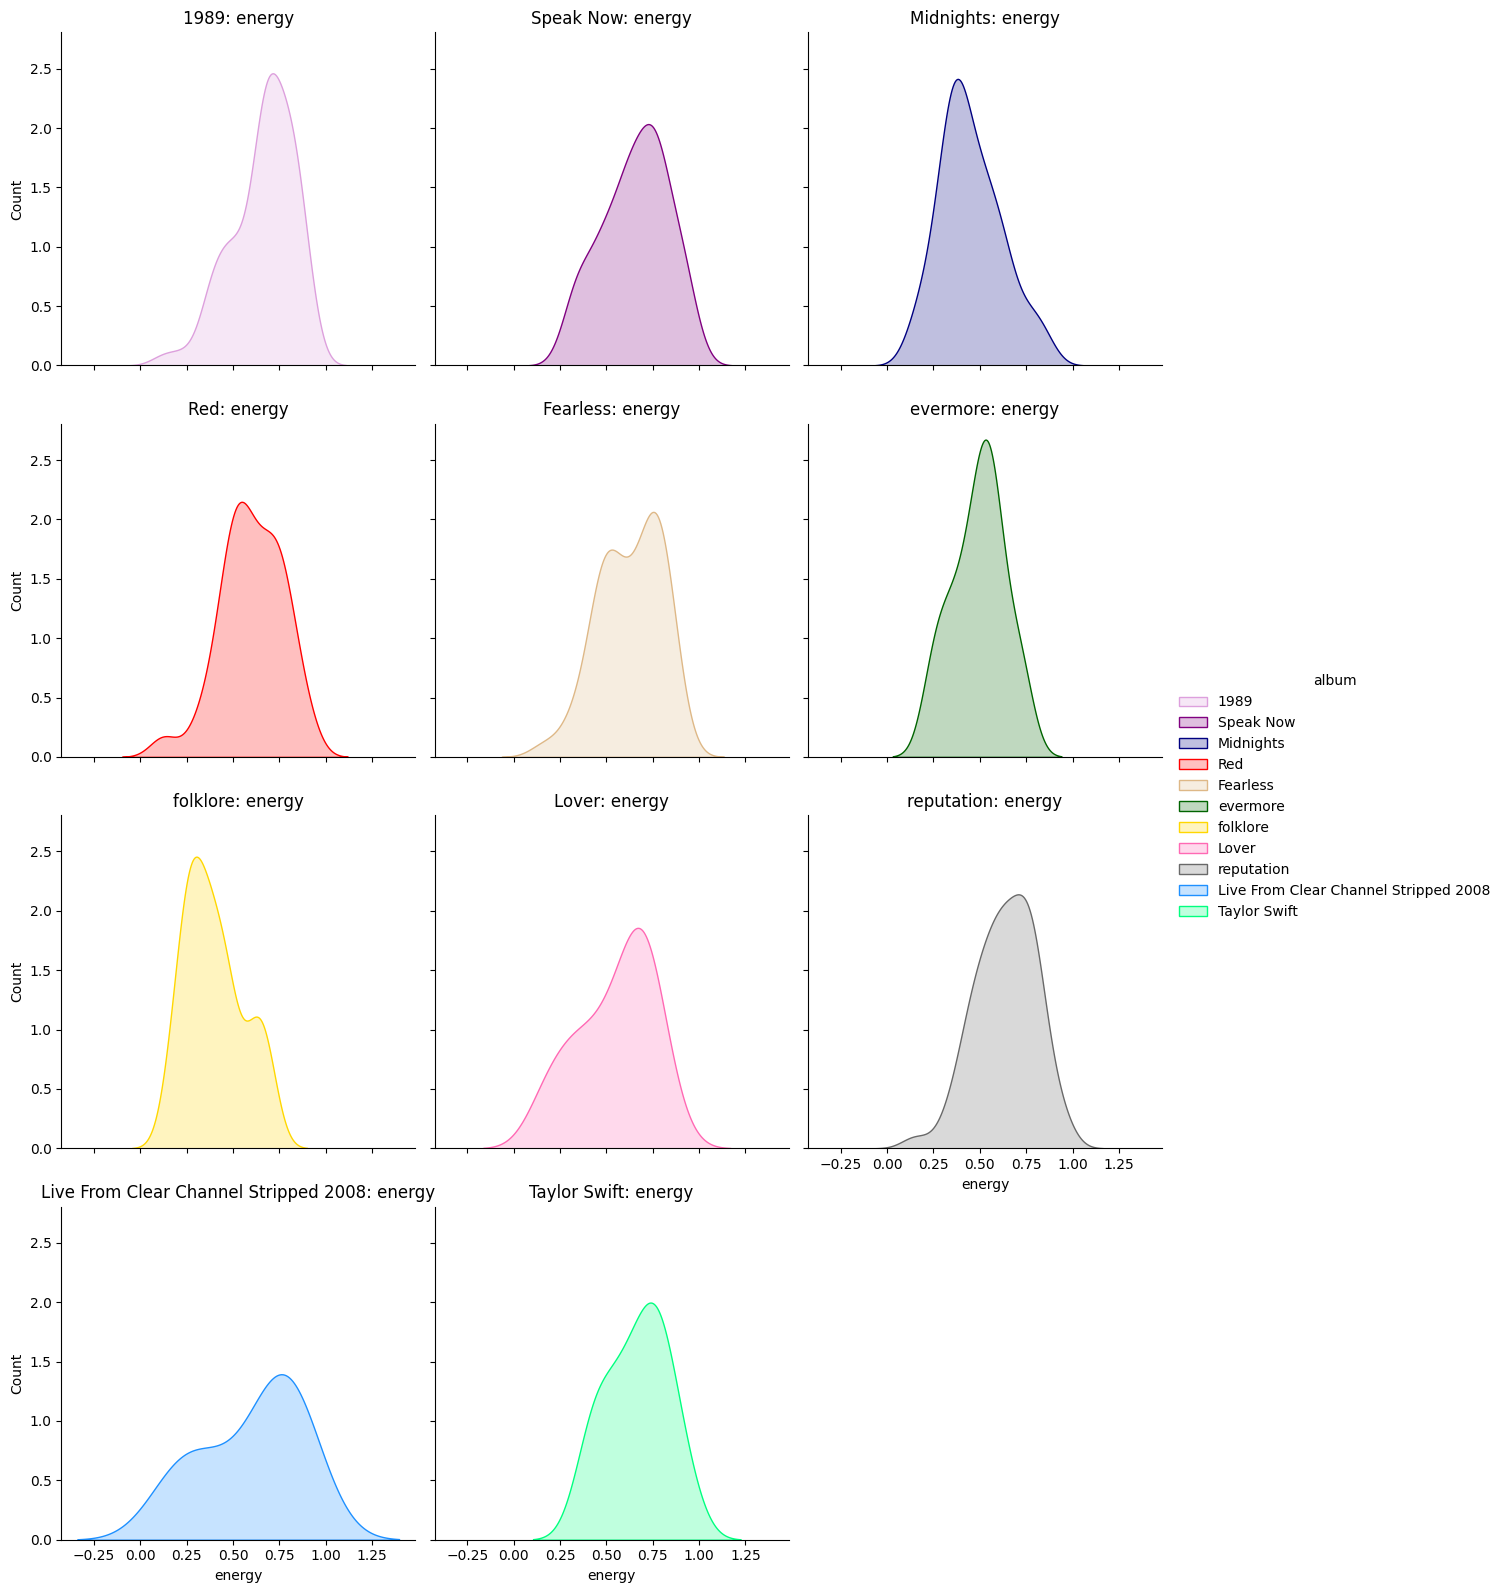

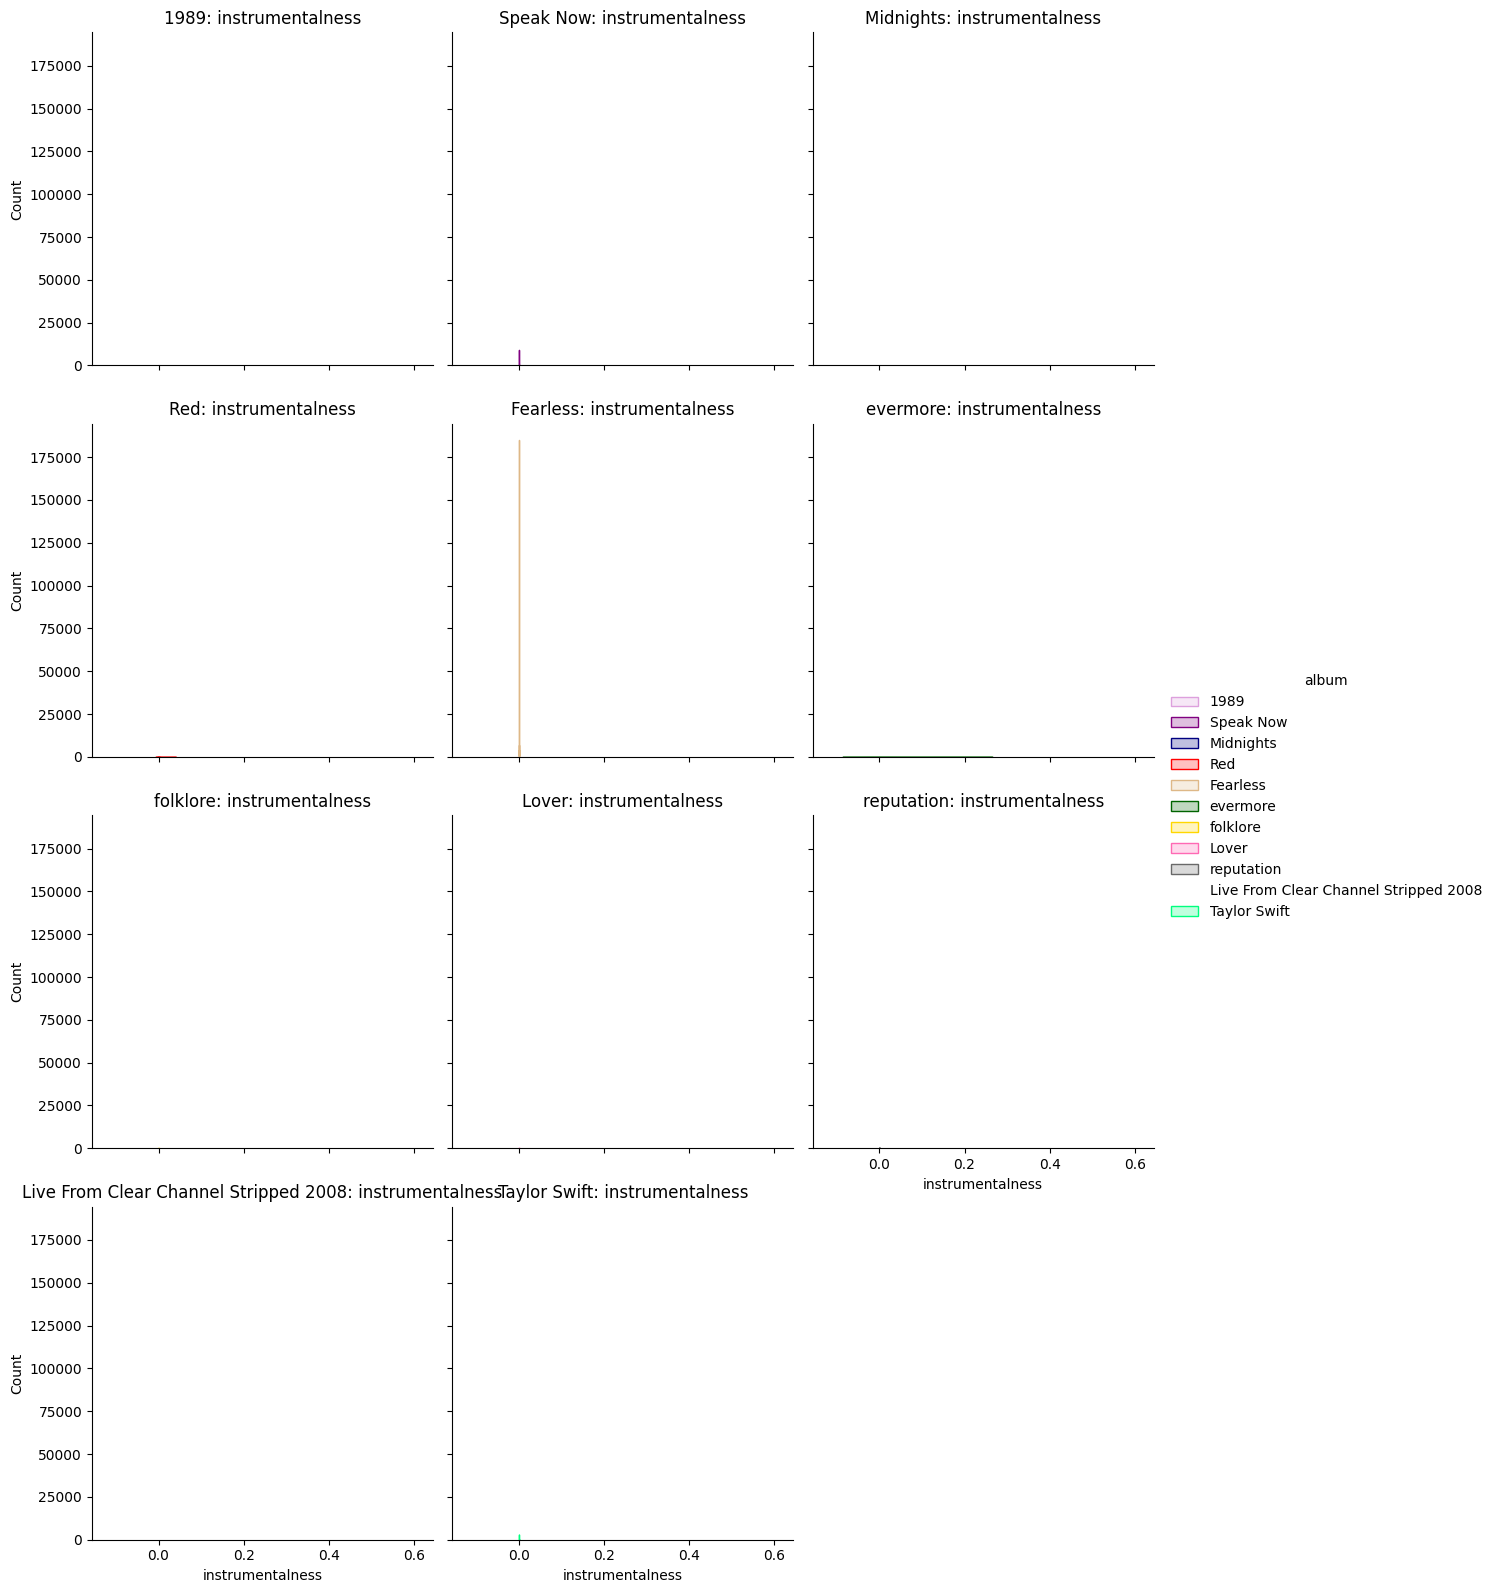

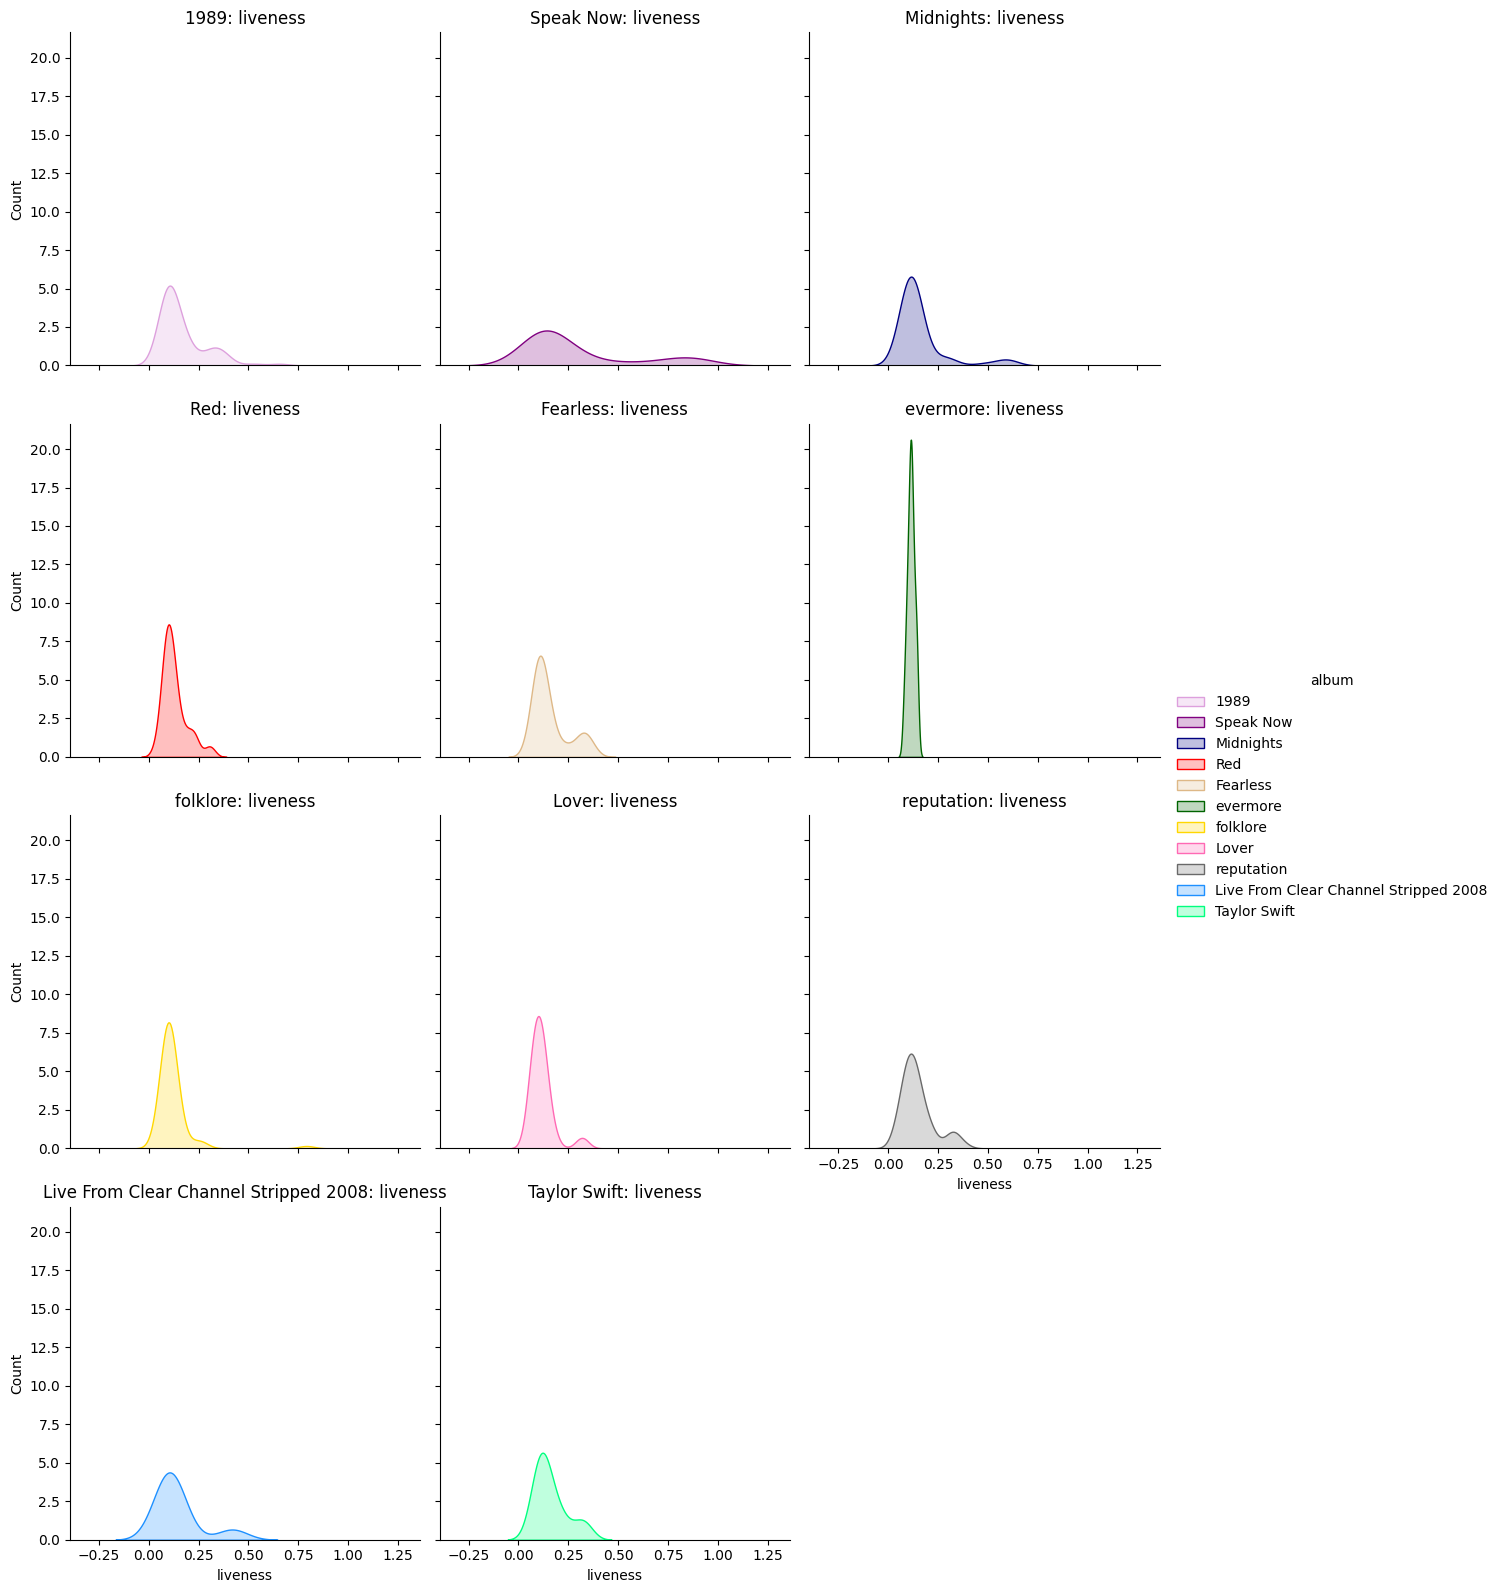

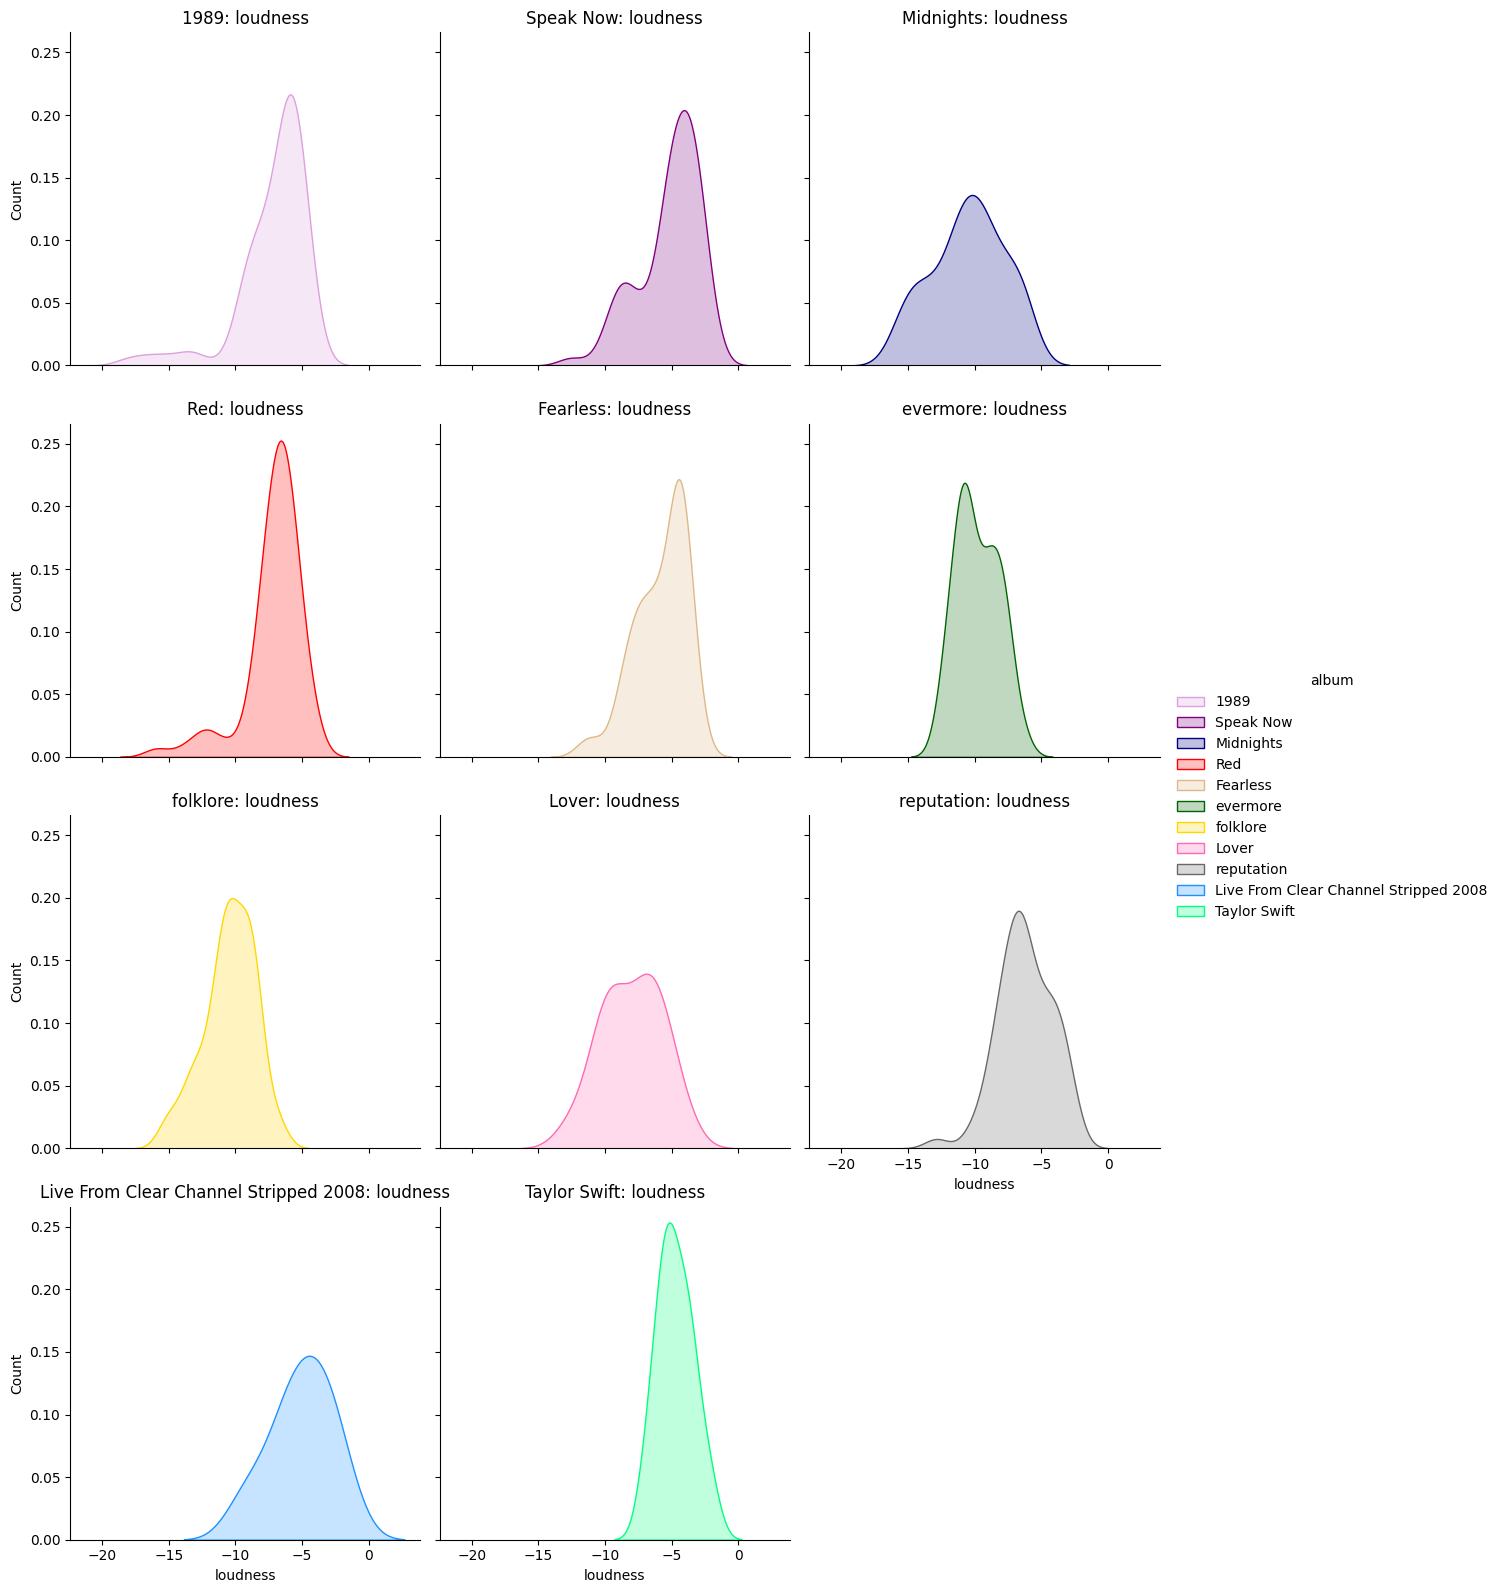

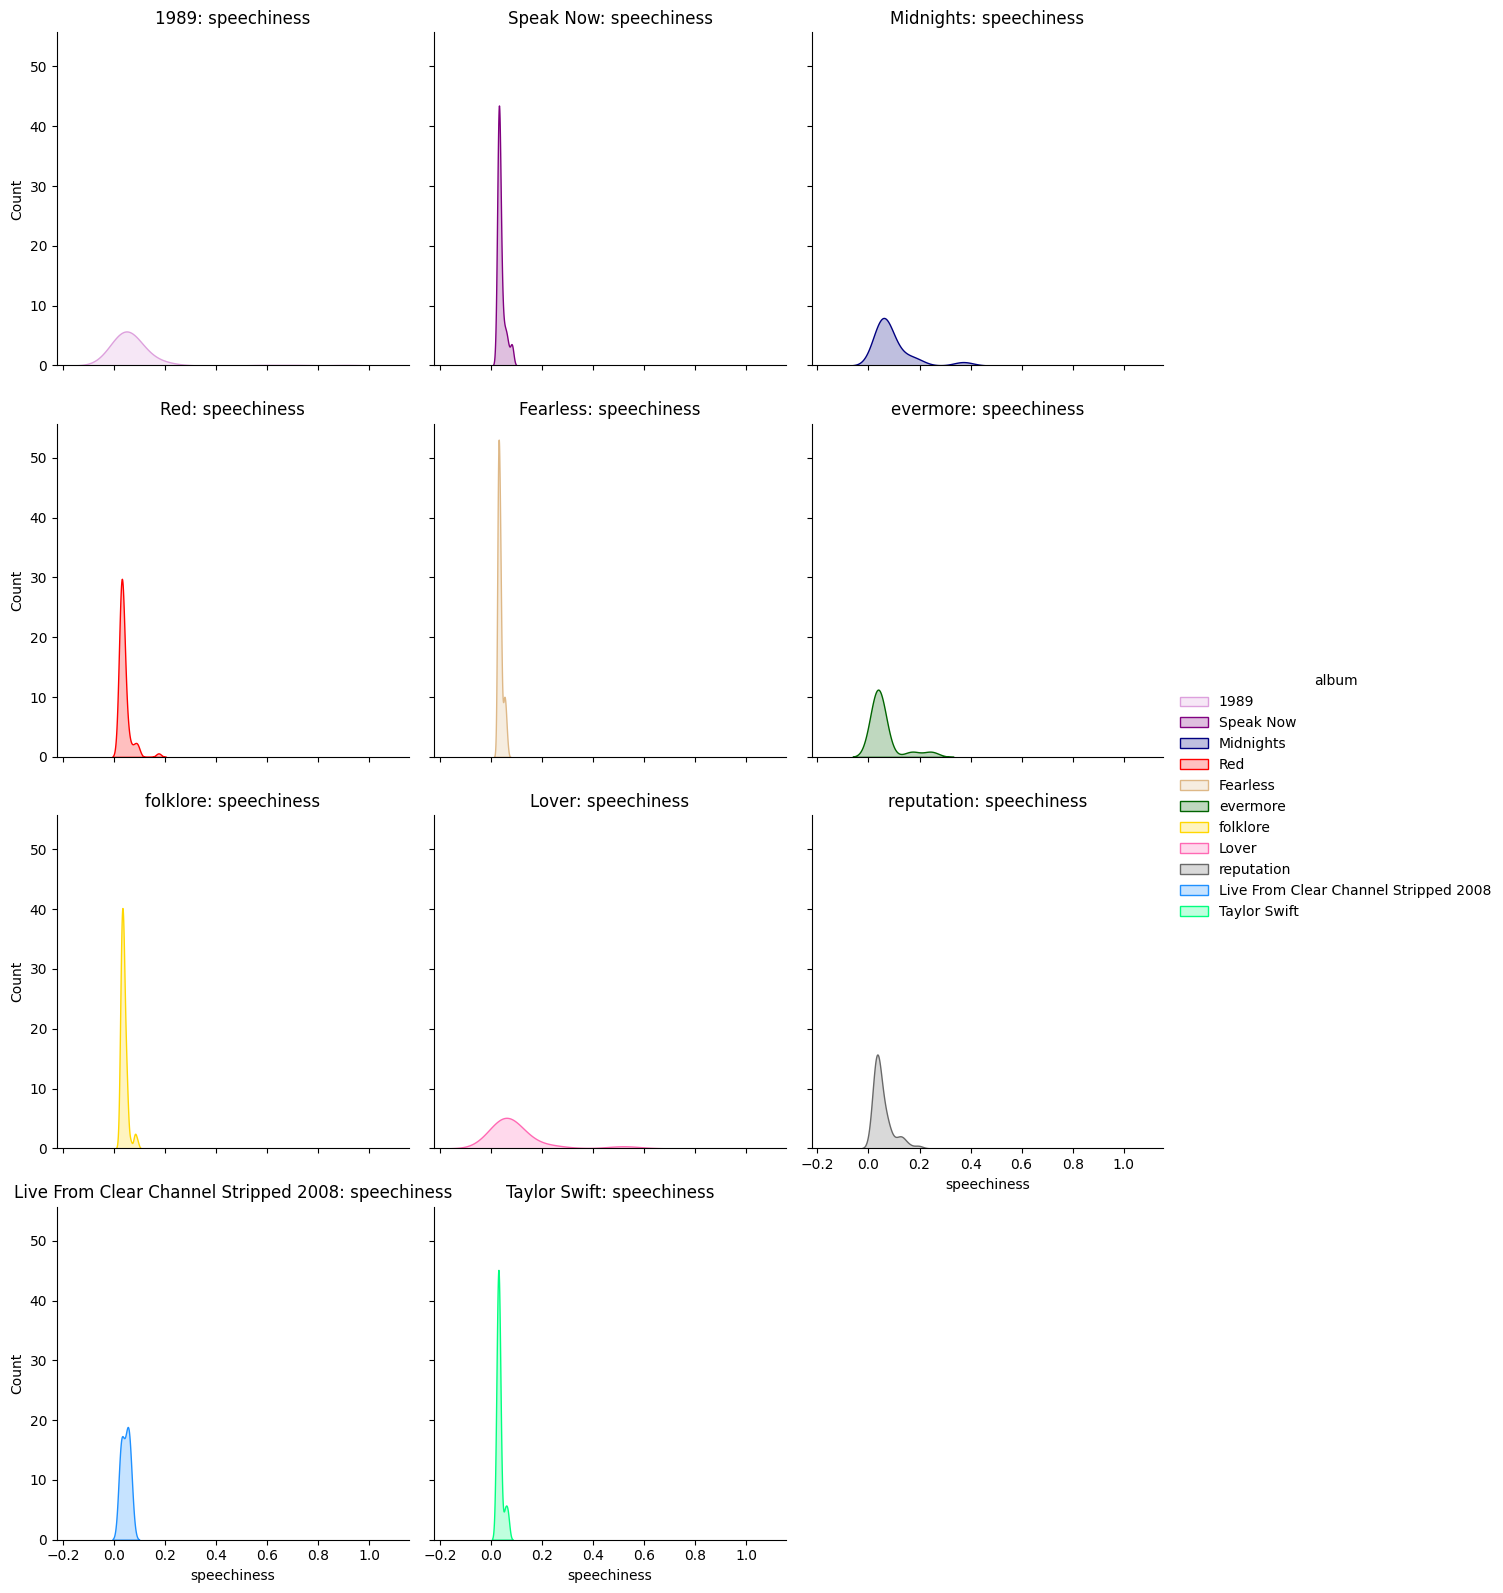

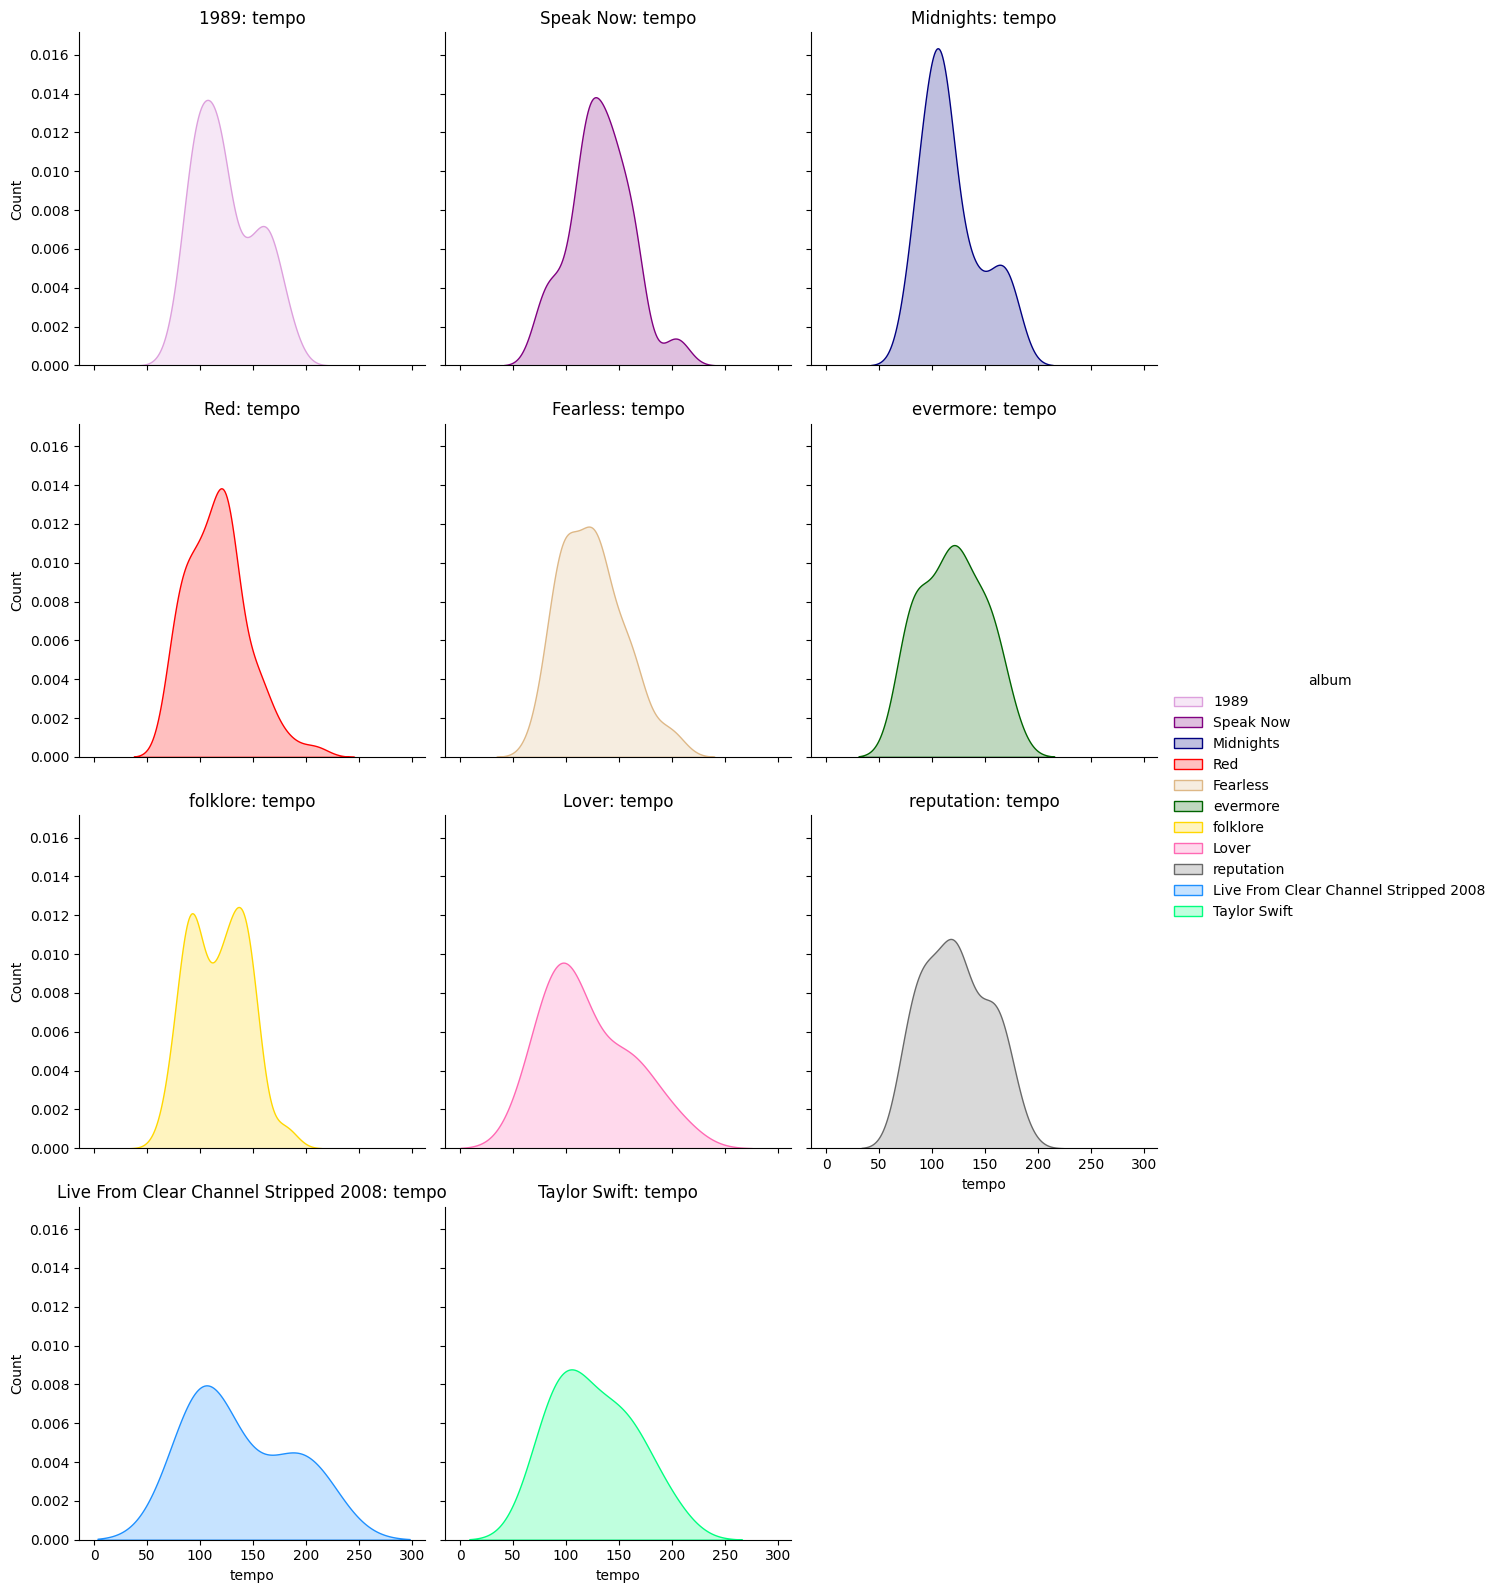

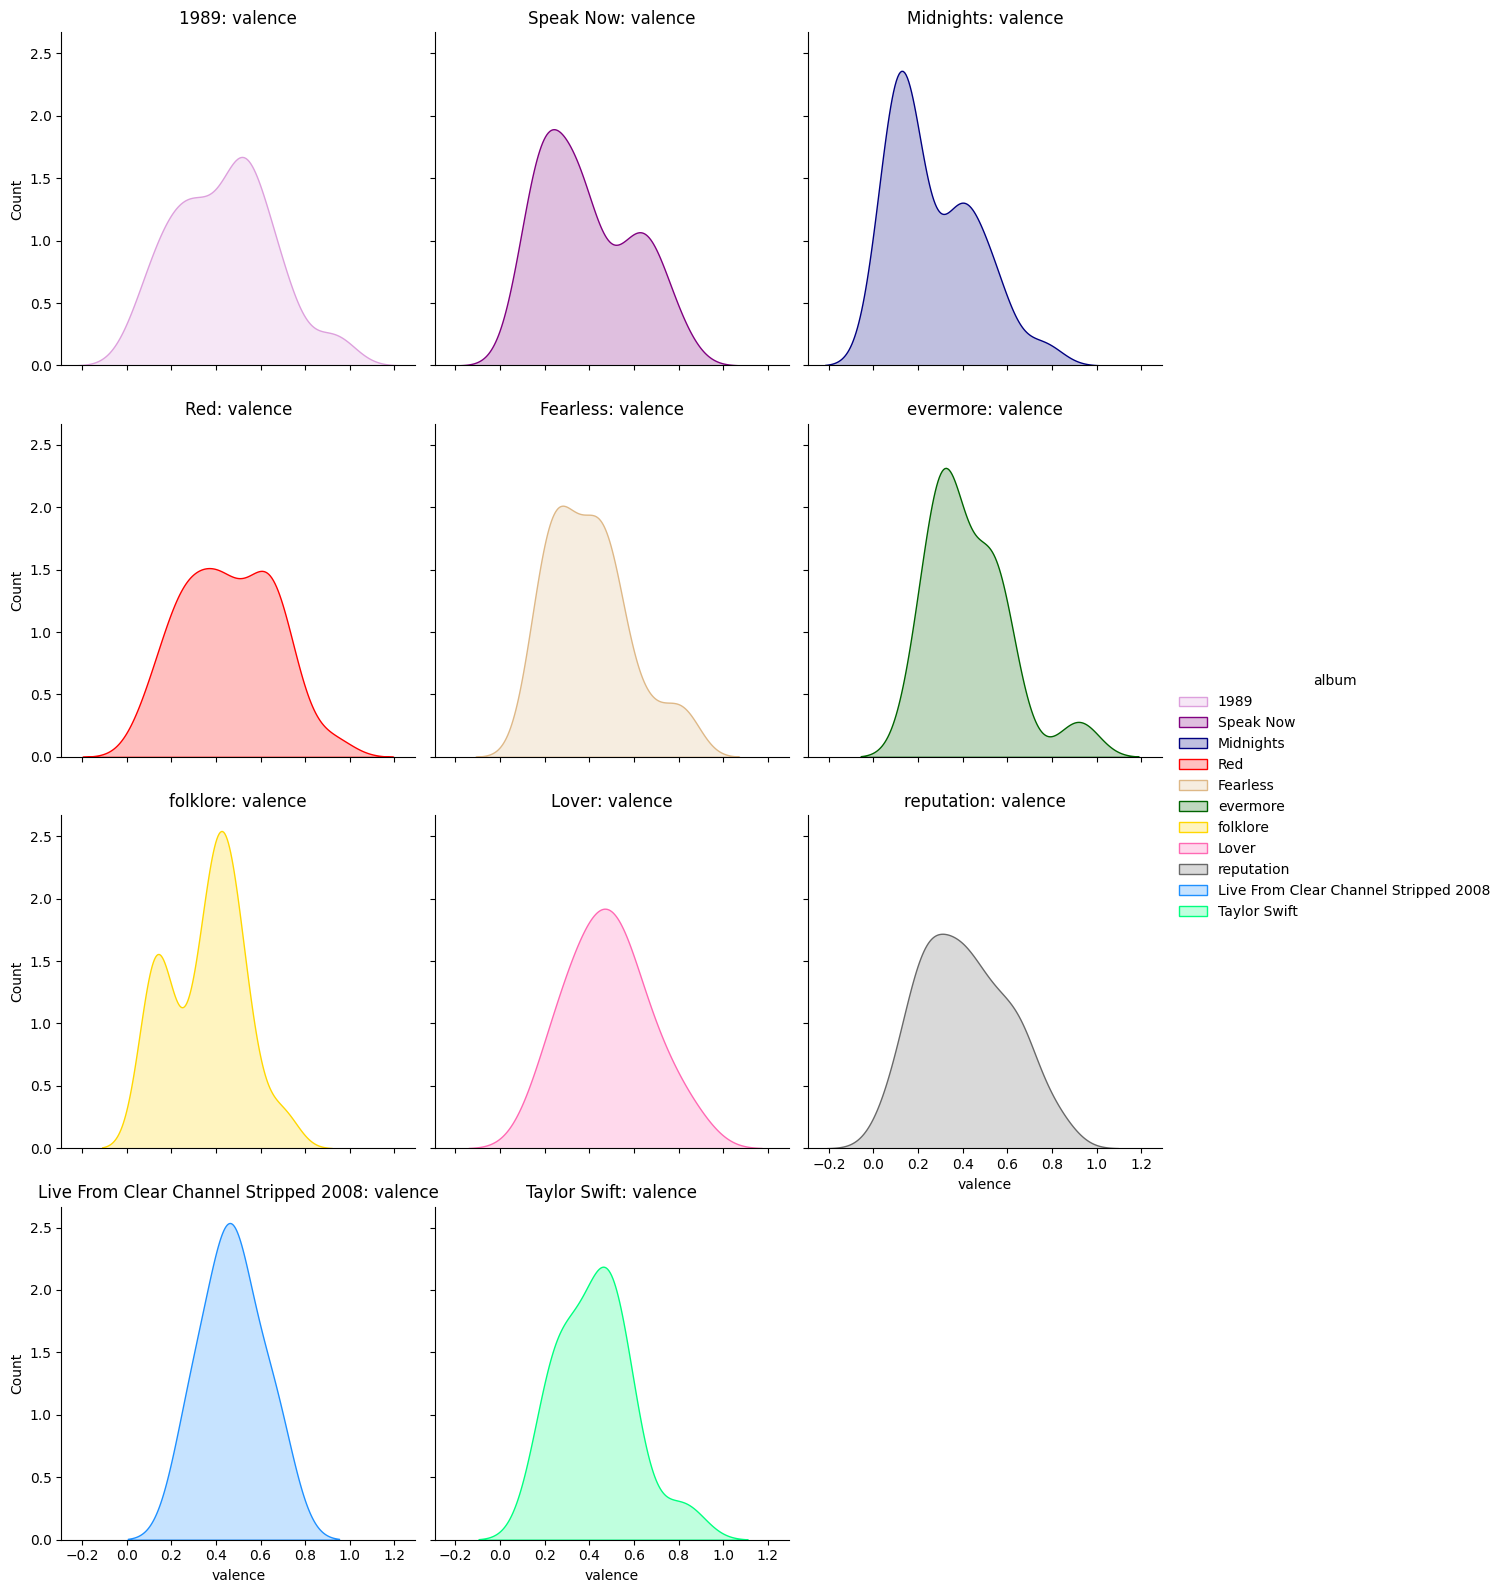

In [9]:
# Create a FacetGrid to illustrate the distributions of the musical features across the different albums
album_colors=['plum', 'purple', 'navy', 'red', 'burlywood', 'darkgreen', 'gold', 'hotpink', 'dimgray', 'dodgerblue', 'springgreen']

# Iterate over musical features and create a FacetGrid showing distribution of this feature over each album
for feature in feature_names:
    grid = sns.FacetGrid(df, col='album', col_wrap=3, height=4, sharey=True, hue='album', palette=album_colors)
    grid.map_dataframe(sns.kdeplot, x=feature, fill=True) # Kernel density plot highlighting feature distribution
    grid.set_axis_labels(feature, 'Count')

    # Customize the title for each subplot
    # The split function extracts the album name after the 'Album = ' string
    for ax in grid.axes.flat:
        ax.set_title(f"{ax.get_title().split('= ')[1]}: {feature}", fontsize=12) 
        
    grid.add_legend()
plt.show()


These kernel density distribution plots show how the 'instrumentalness' and 'speechiness' attributes do not have very much variance across songs. Therefore, these features will be omitted from the training data, as they do not seem to be too significant in determining the album's sound quality. The plot also demonstrates that there is considerable variance between the audio features of the different albums, which seems promising for the hypothesis that the album name can be predicted based on these distinctive sound attributes for each song.

Next, we will use a seaborn pairplot to visualize the correlations between the selected audio features. Multiple features being correlated with each other is known as *multicollinearity* and can cause problems for machine learning algorithms, such as [reduced accuracy of estimates, difficult ascertaining which features (or splits in decision trees) are most important, and overfitting](https://towardsdatascience.com/handling-multi-collinearity-6579eb99fd81#:~:text=Multi%2Dcollinearity%20results%20in%20the,increases%20the%20chances%20of%20detection.).

In [10]:
# Select the features excluding instrumentalness and speechiness following the findings from the above visualization
selected_features = ['acousticness', 'danceability', 'energy', 'liveness', 'loudness', 'tempo', 'valence']

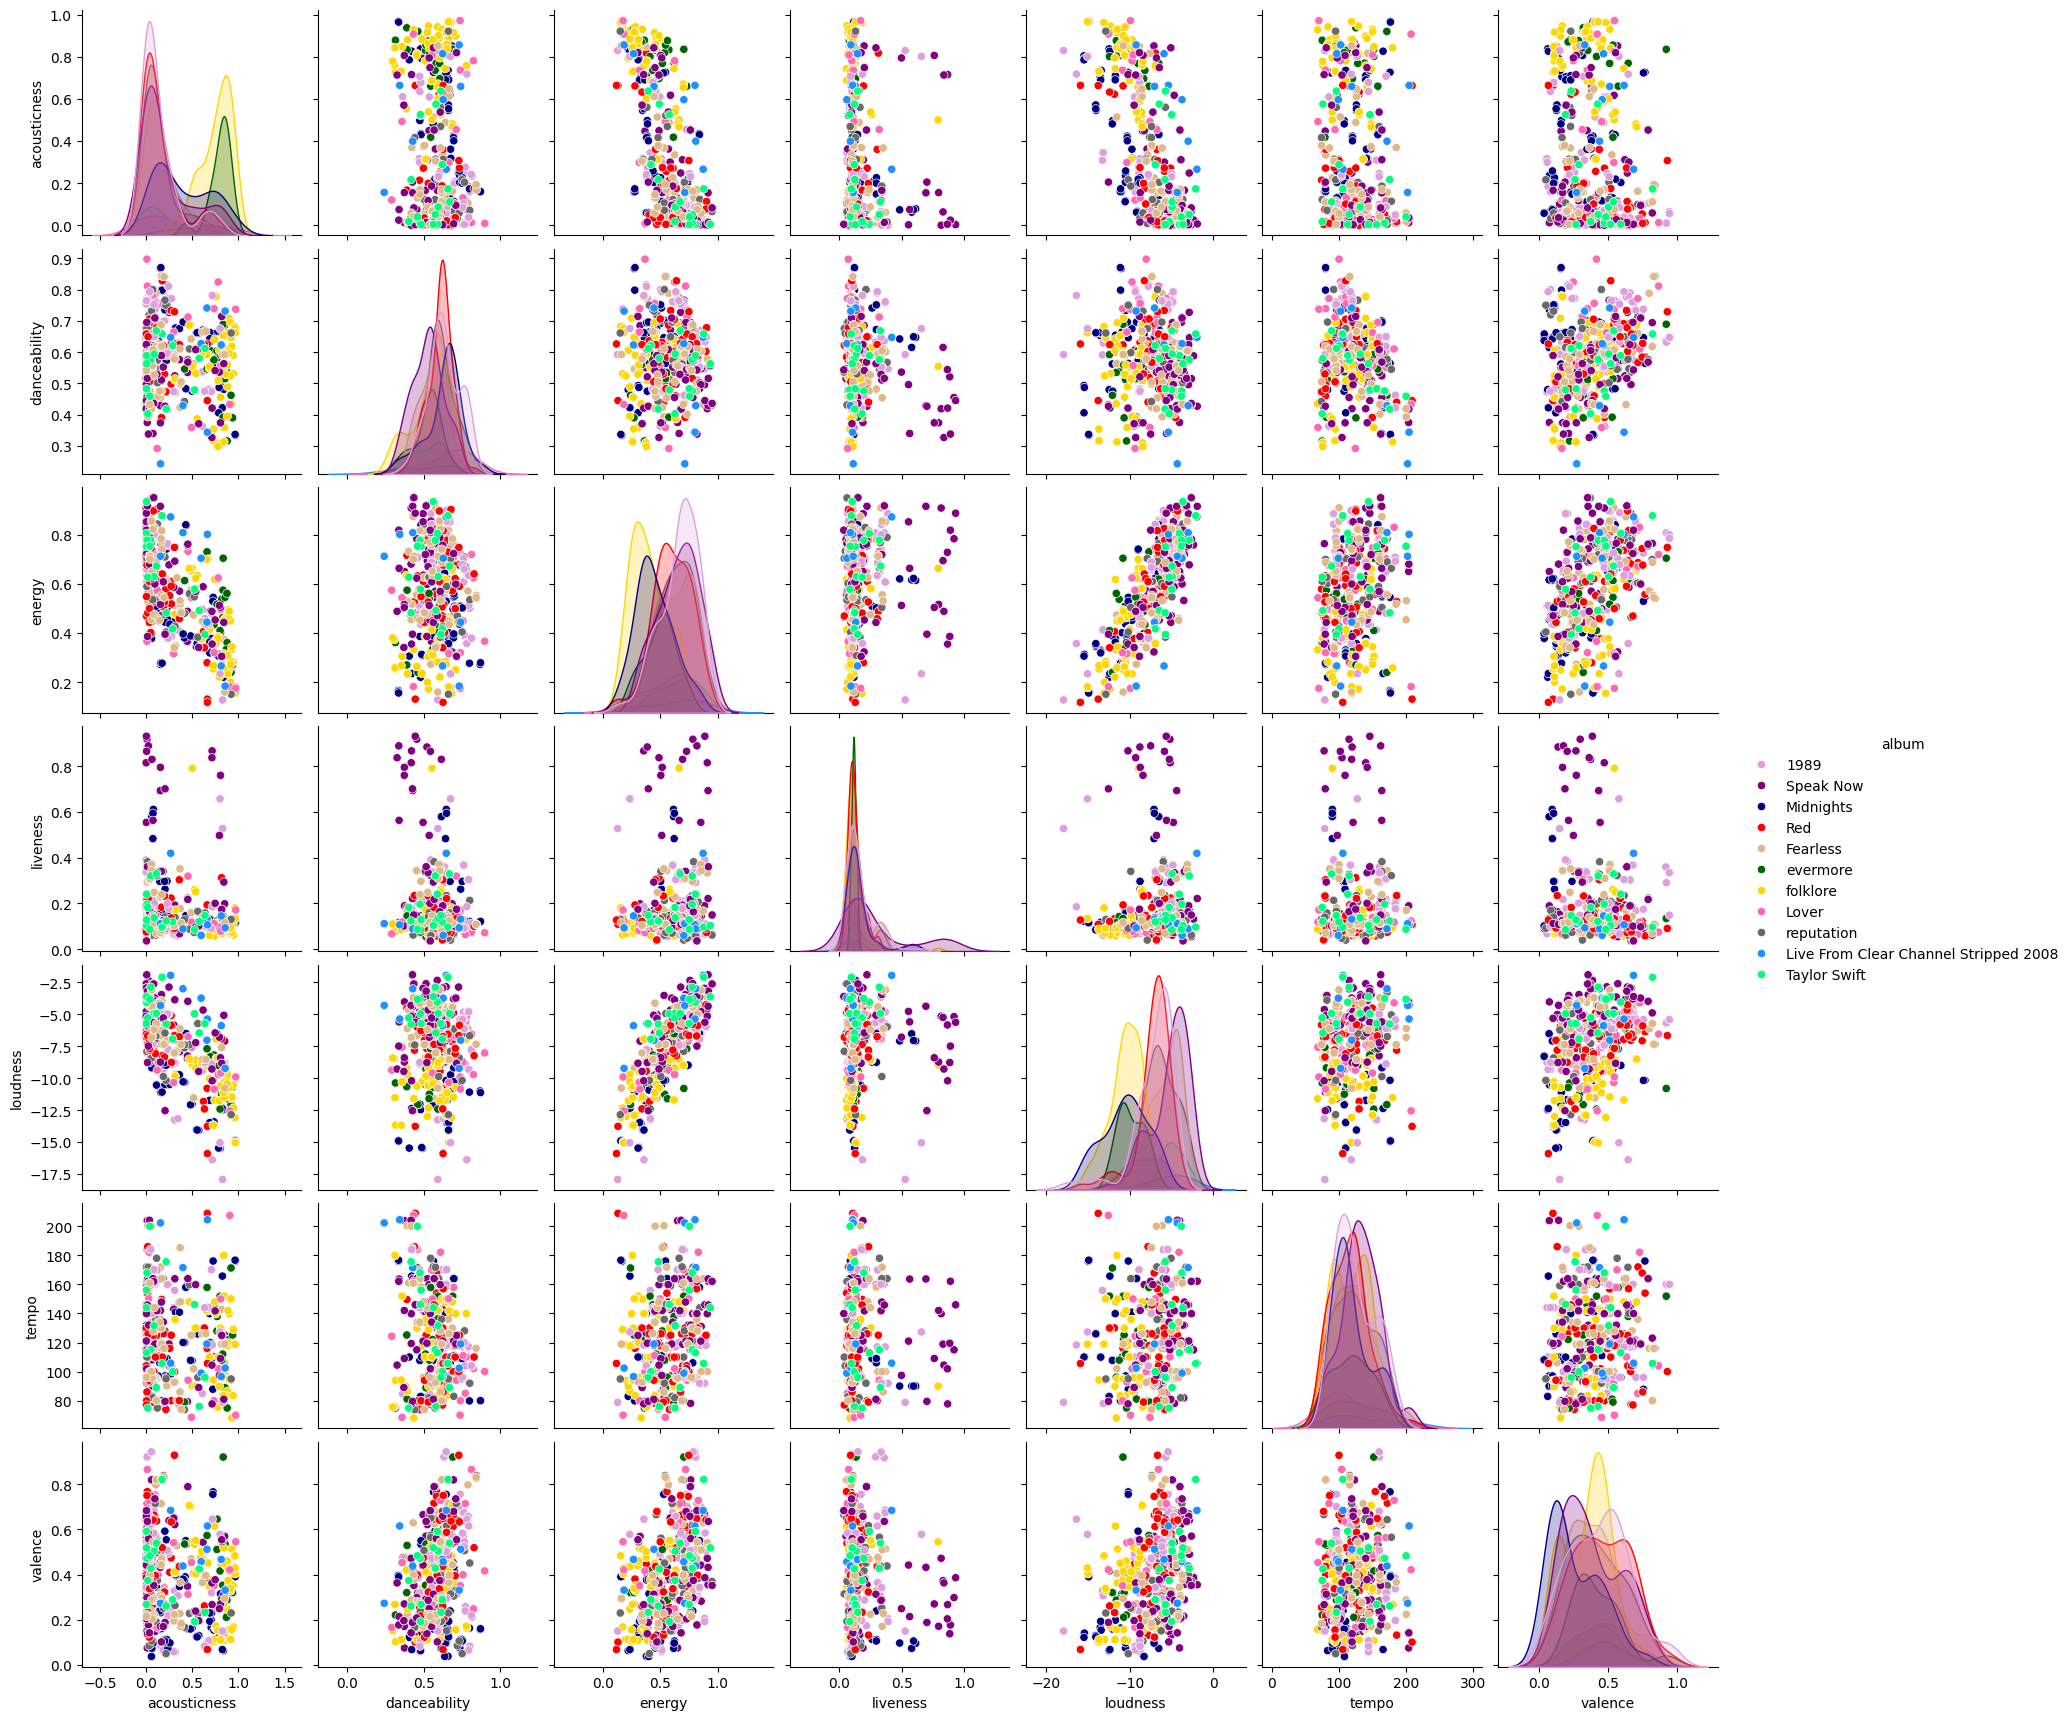

In [11]:
sns.pairplot(data=df, hue='album', palette=album_colors,  vars=selected_features, kind='scatter')
plt.show()

This pairplot shows that there is no strong linear correlation between any pair of these features, therefore we will use these seven features to train the models.

## K-Nearest Neighbour Classification

Having selected the most relevant features based on the above analysis, we will now extracts ma features from the album labels into a features matrix and a target array visebelachine learnine pre-requisite for any supervised machine learning classification task.
As mentioned in the report, the values of the features will be scaled to try [to assign each feature an equal weight and to avoid larger-scaled features having disproportionately great influence on the neighbour selection](https://arxiv.org/ftp/arxiv/papers/1811/1811.05062.pdf).
</br>
</br>
[Reference 1](https://arxiv.org/ftp/arxiv/papers/1811/1811.05062.pdf)
[Reference 2](https://medium.com/analytics-vidhya/why-is-scaling-required-in-knn-and-k-means-8129e4d88ed7)

In [12]:
# Extract the features matrix:
features_matrix = df.loc[:, selected_features] # loc function to index into all rows, only selected features
# Show the selected features matrix shape
print(features_matrix.shape)
features_matrix.head(10) 

(530, 7)


acousticness  danceability  energy  liveness  loudness    tempo  valence
0      0.009420         0.757   0.610    0.3670    -4.840  116.998    0.685
1      0.088500         0.733   0.733    0.1680    -5.376   96.057    0.701
2      0.000421         0.511   0.822    0.0899    -4.785   94.868    0.305
3      0.000537         0.545   0.885    0.3850    -5.968   92.021    0.206
4      0.000656         0.588   0.721    0.1310    -5.579   96.997    0.520
5      0.012100         0.636   0.808    0.3590    -5.693  160.058    0.917
6      0.003540         0.670   0.858    0.0687    -6.528  118.009    0.539
7      0.036200         0.618   0.683    0.3050    -6.438  169.971    0.363
8      0.043600         0.589   0.674    0.1120    -7.480  139.985    0.514
9      0.001960         0.758   0.691    0.0939    -5.798  119.997    0.538

In [13]:
# Now extract the 'target array' from the datarame, i.e. album name (the label we want to predict)
target_array = df['album']
target_array.head(10)

0    1989
1    1989
2    1989
3    1989
4    1989
5    1989
6    1989
7    1989
8    1989
9    1989
Name: album, dtype: object

In [14]:
# Function to compute z-scores for scaled features matrix to enable Euclidian distance calculations for k-NN
def normalize(col): # takes each feature column as input argument
    mean = col.mean() 
    std = col.std()
    return ((col-mean) / std) # apply z-score formula to values in the column

# Apply to features matrix per column
scaled_features_matrix = features_matrix.apply(normalize) # each value is now that feature's nr of std deviations left or right from the mean
scaled_features_matrix.head(10) # 

acousticness  danceability    energy  liveness  loudness     tempo  \
0     -0.947357      1.517974  0.184744  1.430510  0.906906 -0.177809   
1     -0.705554      1.305812  0.826824  0.031689  0.724534 -0.875836   
2     -0.974873     -0.656684  1.291418 -0.517296  0.925620 -0.915469   
3     -0.974518     -0.356121  1.620289  1.557036  0.523107 -1.010368   
4     -0.974154      0.024002  0.764182 -0.228394  0.655464 -0.844503   
5     -0.939162      0.448325  1.218336  1.374276  0.616675  1.257512   
6     -0.965336      0.748888  1.479344 -0.666316  0.332569 -0.144109   
7     -0.865471      0.289204  0.565816  0.994696  0.363191  1.587942   
8     -0.842845      0.032842  0.518835 -0.361949  0.008654  0.588418   
9     -0.970167      1.526814  0.607577 -0.489179  0.580949 -0.077843   

    valence  
0  1.441069  
1  1.521234  
2 -0.462847  
3 -0.958868  
4  0.614369  
5  2.603461  
6  0.709564  
7 -0.172250  
8  0.584307  
9  0.704554

### k-NN Implementation from Scratch

In [25]:
# References to tutorials for implementing this algorithm (although I adapted it to get weights of each neighbor):
# Reference: https://kenzotakahashi.github.io/k-nearest-neighbor-from-scratch-in-python.html
# Reference: https://medium.com/lukasfrei/machine-learning-from-scratch-knn-b018eaab53e3
# Reference: https://insidelearningmachines.com/knn_algorithm_in_python_from_scratch/

# First create an auxiliary function used to calculate the Euclidian difference between two samples or rows, each containing n features
def euclidianDistance(sample1, sample2):
    # First calculate the SQUARED difference (this stops negative and positive distances from cancelling out) between the values of 
    # each feature/attribute for the two samples. We will do this by taking advantage of NumPy's vectorized operations.
    differences_between_sample_features = sample2 - sample1
    # Square these differences.
    squared_differences_between_sample_features = np.power(differences_between_sample_features, 2)
    # Sum up the squared differences now!
    sum_squared_differences_between_sample_features = np.sum(squared_differences_between_sample_features)
    # Return the square root of the summation.
    return np.sqrt(sum_squared_differences_between_sample_features)

# Constructs a new Python class for the k-NN model.
# The class accepts only one input parameter upon instantiation, which is 'k'.
# This is the number of neighbours to select and weigh for each test sample.
class KNearestNeighbourClassifier:
    # Constructor function: takes in 1 input arg which is an integer storing k (nr of nearest neighbours)
    def __init__(self, k): 
        # Set k or nr of neighbors
        self.k = k
        # Initialize the training data features matrix (X_train) and labels (y_train) to empty arrays
        self.X_train = np.array([])
        self.y_train = np.array([])
        # This array stores the k-weights for each of the distances for the k-closest neighbours
        # I.e. the closest neighbour is multiplied by 1, the second-closest neighbour by 1/2, the third-closest by 1/3 in the case of k=3.
        # The weights for each album-label mentioned in the k-closest neighbours are then summed up, and the label with the greatest weight is predicted.
        self.weights_array = 1 / (np.arange(self.k) + 1)
        # This will store and return the y_pred/predicted album labels for the test samples after the predict() method is called
        self.predicted_labels = []
        
    # 'fit' doesn't do anything because this is a lazy learning algorithm as explained above
    # It merely STORES the features matrix X and target labels Y for the training data, ready to use when 'predict' is called.
    def fit(self, X_train, y_train):
        # Convert features and target vector from dataframes/Series to np array
        self.X_train = X_train # Store the features-matrix for the training data
        self.y_train = y_train # Store the labels/target vector for the training data

    # Selects the k-nearest neighbors for each test sample in X_test, and then selects the label of the most heavily-weighted neighbor
    def predict(self, X_test):
        self.predicted_labels = []
        # Throw an Exception if there was no training data entered.
        # Reference: https://insidelearningmachines.com/knn_algorithm_in_python_from_scratch/
        if (self.X_train.size == 0) or (self.y_train.size == 0): # checks that training data not empty
            raise Exception('Error - Model is not trained: call "fit" on training data prior to "predict",')
        # Iterate over each test sample [i.e. new song row] in the X_test samples array
        for test_sample in X_test:
            # Initializes an empty list/array which will contain the distances for THIS specific test sample to every one of the training samples.
            test_sample_distances = []
            # Iterates over the training data instances to measure the Euclidian distance between this iteration of test sample
            # and all of the training samples in X_train. 'j' represents the index of every sample in X_train [a row representing a stored song].
            for j in range(len(self.X_train)):
                # Calculate the floating-point number representing the distance between this test sample and this train sample indexed at row j
                # Use index slicing to get 'j' & all cols (features) from the X_train features matrix
                test_sample_distance = euclidianDistance(np.array(self.X_train[j, :]) , test_sample)  
                # Appends the new (floating-point) distance to the list of distances between this test sample and each one of the training samples
                test_sample_distances.append(test_sample_distance) 
            # Converts the array of distances for this test sample to NumPy array: this enables the useful NumPy function argsort
            test_sample_distances = np.array(test_sample_distances)
    
            # NumPy argsort: sorts the array of distances and returns the indices of the elements in the array that would result in the sorted array
            # Reference: https://www.geeksforgeeks.org/numpy-argsort-in-python/
            indices_of_closest_neighbours = np.argsort(test_sample_distances)[:self.k]
            # Extract the sorted distances from the array of distances using the argsort indexes
            closest_distances = test_sample_distances[indices_of_closest_neighbours]
            # Then multiply these distances of the k-closest neighbours by the np weights array using element-wise, vectorized multiplication
            weighted_closest_distances = closest_distances * self.weights_array
            # Use the indices of the closest neighbours to access the actual labels/album names of these neighbours
            labels = self.y_train[indices_of_closest_neighbours]
            # Create a dict which will store:
            # - Key: each album/label for the top k neighbours
            # - Value: the summed total of its weighted distance from test sample
            label_weights = {}
            # Pair the album labels with their weighted distances from the sample into tuples using the zip() function.
            # Then iterate over the paired tuples.
            # Reference: https://www.w3schools.com/python/ref_func_zip.asp
            for label, weighted_distance in zip(labels, weighted_closest_distances):
                # If the album name (the 'label') is not yet in the label_weight dicts, add it as a key, with the weighted distance as the value
                if label in label_weights:
                    label_weights[label] += weighted_distance
                # If the album name is already in the dict, sum the new weighted distance to the existing weighted distance for that album
                else:
                    label_weights[label] = weighted_distance
            # Extract the label (dict key) associated with the max weight [value] for that test sample
            # Reference: https://datagy.io/python-get-dictionary-key-with-max-value/#:~:text=The%20simplest%20way%20to%20get,maximum%20value%20of%20any%20iterable.&text=What%20we%20can%20see%20here,max%20value%20of%20that%20iterable.
            predicted_label = max(label_weights, key=label_weights.get)
            # Append the label to the list of predictions for the test samples
            self.predicted_labels.append(predicted_label)
        # Returns the completed list of predicted labels for all the test samples
        return self.predicted_labels
            

#### Nested-Cross Validation for Evaluating the Performance of the k-Nearest Neighbour Algorithm on Album Prediction

In this section, several functions will be defined to enable five-fold nested cross-validation to evaluate the performance of the k-NN algorithm. There are several justifications for this decision.
1. Firstly, this dataset is not very large, and it is imbalanced (some albums have a much greater number of songs than others). Therefore, to make the maximum use of the data, cross-validation allows different combinations of songs to be used for training and testing for each 'fold'. This increases the probability of songs from each album being represented in the training sets.
2. Secondly, cross-validation reduces overfitting: when a model is very successful at classifying training data because it learns the details of the features in the training set too well, but fails to generalize beyond these findings when applied to new data. Cross-validation enables the model to be trained on different combinations of rows in the dataset, therefore exposing it to more nuanced and general pattterns, rather than relying on the evaluation of the outcome of only one set of data.
3. Finally, we could achieve the above aim solely by using cross-validation without nesting. However, nested cross-validation allows us to tune the model to find the best value for the *k* hyperparameter. For each 'fold' (new train/test split), the training set is further divided into a training and validation set, which is tested using a range of values for *k*. The metric used to decide the optimal value of *k* for each nested fold will be the *f1 score*, which is the 'harmonic mean' of the precision and recall metric. [Recall is defined as the ratio between true positives, i.e. correctly identified positive cases, and all the instances of that album, and is given by the formula **True_Positives/(True_Positives + False_Negatives)**](https://medium.com/analytics-vidhya/accuracy-vs-f1-score-6258237beca2#:~:text=Accuracy%20can%20be%20used%20when,to%20evaluate%20our%20model%20on.). In other words, it measures the proportion of songs from an album which the algorithm correctly identified as belonging to that album. [Precision measures the *correct* proportion of labels from all the predicted labels for an album, and is defined by the formula **True_Positives/(True_Positives + False_Negatives)**]. Essentially, it is a way of quantifying the probability of how correct a certain prediction for an album is. In contrast, accuracy is the propotion of all correct classifications (negative and positive) out of all the classifications. The problem with using accuracy as a comparison metric here is that ['accuracy can be used when the class distribution is similar while F1-score is a better metric when there are imbalanced classes'.](https://medium.com/analytics-vidhya/accuracy-vs-f1-score-6258237beca2#:~:text=Accuracy%20can%20be%20used%20when,to%20evaluate%20our%20model%20on.). In this case, we have imbalanced classes with some albums being over-represented, therefore F1 is a better measure of the algorithm's performance here. Accuracy can actually be very misleading if you have uneven classes, as high accuracy could be achieved just by predicting the majority class all the time, which in this case, is the album 1989. [This is a phenomenon which has been recognized as the 'Accuracy Paradox'.](https://proclusacademy.com/blog/explainer/precision-recall-f1-score-classification-models/).


In [26]:
# Perform n-fold nested cross validation to find the best hyperparameter/value of 'k'
# Divide the dataset into x 'folds' (x different train-test sets comprised of different inputs and labels for the training and test data)

# Import f1 metric
from sklearn.metrics import f1_score
# Import confusion matrix class for evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Summary of metrics to evaluate the model
from sklearn.metrics import classification_report

# Create one fold with 80% training data and 20% test data split
def createFold(X, y):
    # Randomly shuffles the indices of the sample data.
    random_indices = np.random.permutation(len(X))
    # Calculate the count for 80% of samples (train).
    nr_training_samples = round(len(X) * 0.8)
    # Calculate the count for 20% of samples (test).
    nr_test_samples = len(X) - nr_training_samples
    # Get the indices used to extract the train and test data
    train_indices = random_indices[:nr_training_samples]
    test_indices = random_indices[nr_training_samples:]
    # Extract the training and test inputs and training and test labels using the random indices for this fold.
    X_train, y_train, X_test, y_test = X[train_indices], y[train_indices], X[test_indices], y[test_indices]
    return X_train, y_train, X_test, y_test

# Takes in a training set features matrix (X) and target array of album names (y).
# Runs cross-validation on 'nr_outer_folds' input parameter combinations of train-test data.
# While validating on [1...'nr_inner_folds'] values of k (nearest neighbours) for each outer fold.
# Then, selects value of k with greatest f1 score, and uses this value of k nearest neighbours to test on the outer-fold train-test combination
def kNearestNeighbour_CrossValidation(X, y, nr_outer_folds, nr_inner_folds):
    # Stores the optimal k hyperparameter for each outer fold
    best_k_values_per_fold = []
    # Stores f1 scores for each outer fold
    f1_scores_per_fold = []
    # Confusion matrix for each fold
    confusion_matrices = []
    # Confusion matrix DataFrame with album labels for each fold
    confusion_matrix_dfs = []
    # Classification reports per fod
    classification_reports = []
    # Cross-validate by dividing data into different train-test splits 'nr_outer_folds' times...
    for i in range(nr_outer_folds):
        # Create the new combination of train-test data for this fold
        X1_train, y1_train, X1_test, y1_test = createFold(X, y)
        # Get the training set created in the above line of code and use it to split further into a training-and-validation set for hyperparameter tests
        X2_train, y2_train, X2_test, y2_test = createFold(X1_train, y1_train)
        # Stores the accuracies for each hyperparameter run on the validation set
        inner_fold_scores = []
        # j iterates from 1 to 'nr_inner_folds + 1' to iterate over 1 to 'nr_inner_folds' values for the k hyperparameter
        for j in range(1, nr_inner_folds + 1):
            # Create new instance of k-NN classifier that looks at j nearest neighbours
            knn = KNearestNeighbourClassifier(j)
            # Insert the training set for the inner fold
            knn.fit(X2_train, y2_train)
            # Test on the validation set for the inner fold
            y_validation_pred = knn.predict(X2_test)
            # Store the accuracy for this value of k-nearest neighbours
            # Micro average keyword argument parameter is the most basic kind of f1 score: simply counts true positives, false negatives and false positives.
            inner_fold_scores.append(f1_score(y2_test, y_validation_pred, average='micro')) 
        inner_fold_scores = np.array(inner_fold_scores)
        # Get the value of k nearest neighbours which performed best with the highest accuracy score
        best_k_value = np.argmax(inner_fold_scores) + 1 # Indexed with 0, so add 1 to get back to k
        # Train and test the outer-fold train-test set using this optimal hyperparameter
        outer_knn = KNearestNeighbourClassifier(best_k_value)
        outer_knn.fit(X1_train, y1_train)
        y1_pred = outer_knn.predict(X1_test)
        # Store the accuracy and precision for the outer fold in the function-scope arrays defined at the beginning of the function
        f1 = f1_score(y1_test, y1_pred, average='micro')
        f1_scores_per_fold.append(f1)
        best_k_values_per_fold.append(best_k_value)
        # Store the album names in order from the target array, to use for confusion matrix
        album_names = np.unique(y1_test)
        # Create confusion matrix for this fold:
        c_matrix = confusion_matrix(y1_test, y1_pred, labels=album_names)
        confusion_matrices.append(c_matrix)
        confusion_matrix_dfs.append(pd.DataFrame(c_matrix, index=album_names, columns=album_names))
        # Get the sklearn classification report summary from sklearn
        classif_report = classification_report(
            y1_test,
            y1_pred,
            output_dict=True, # Convert to dictionary
            labels=album_names,
            target_names=album_names,
            zero_division=0.0,) # If divide by 0, set metric to 0
        classification_reports.append(classif_report)
    return np.array(best_k_values_per_fold), np.array(f1_scores_per_fold), confusion_matrices, confusion_matrix_dfs, classification_reports

best_k_values_per_fold, f1_scores_per_fold, confusion_matrices, confusion_matrix_dfs, classification_reports = kNearestNeighbour_CrossValidation(
                                                                                np.array(scaled_features_matrix),
                                                                                np.array(target_array),
                                                                                5, 
                                                                                6
                                                                            )
print(f"Best hyperparameters for k: {best_k_values_per_fold}")
print(f"F1 scores: {f1_scores_per_fold}")
print(f"Mean f1 score: {f1_scores_per_fold.mean()}")


Best hyperparameters for k: [1 1 1 1 1]
F1 scores: [0.56603774 0.60377358 0.60377358 0.55660377 0.56603774]
Mean f1 score: 0.5792452830188679


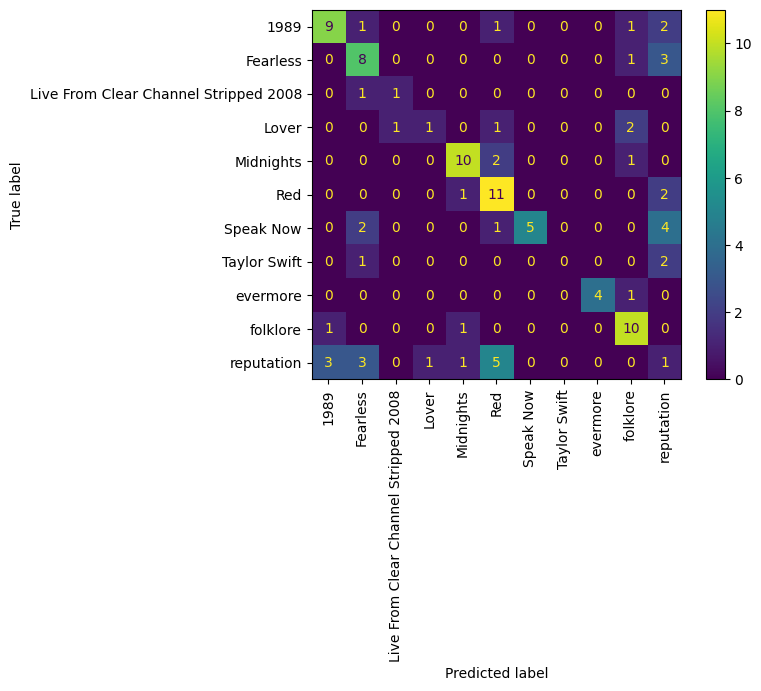

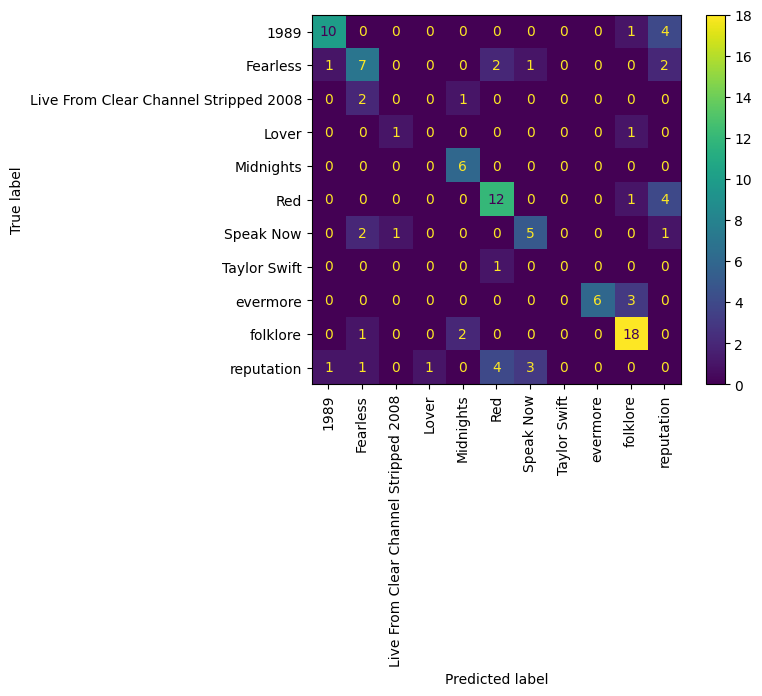

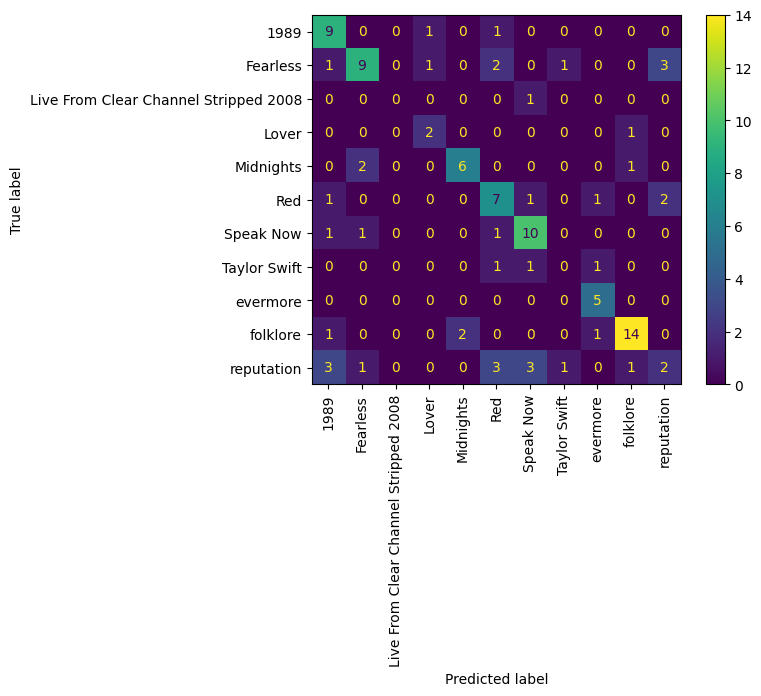

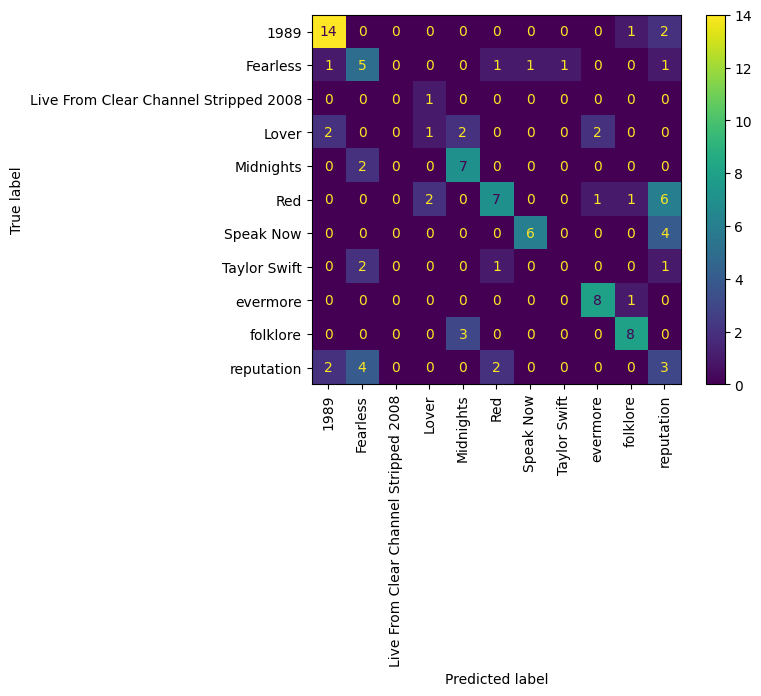

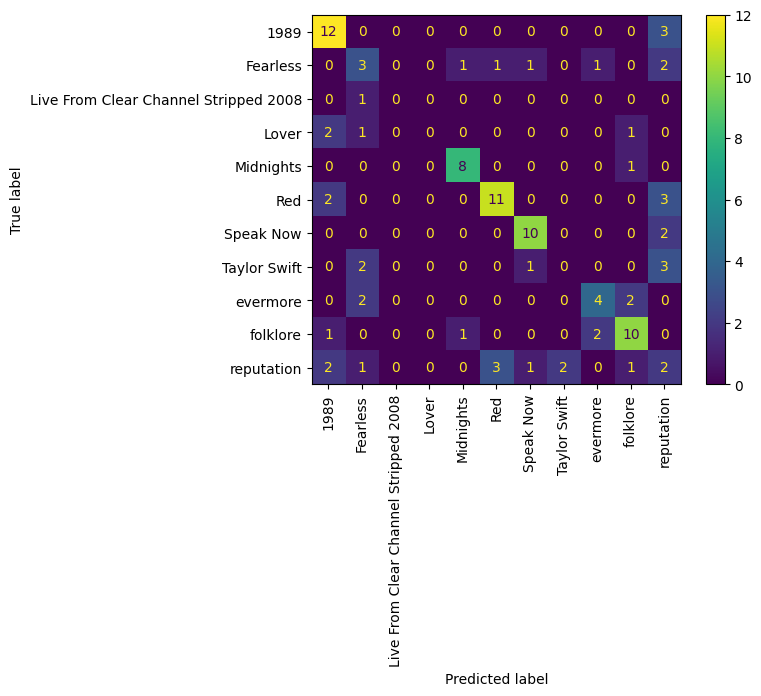

In [27]:
# Display and evaluate the confusion matrices
for matrix, matrix_df in zip(confusion_matrices, confusion_matrix_dfs): # Iterate over the dataframes from the matrix too to get album labelsmatrix, display_labels=matrix_df.colu)
    disp = ConfusionMatrixDisplay(matrix, display_labels=matrix_df.columns)
    disp.plot()
    plt.xticks(rotation=90) # Rotate the x-axis labels so that they do not overlap
    plt.show()
    print('\n\n\n\n\n\n')

A quick glace at these confusion matrices shows that the k-NN algorithm performed better than simply guessing the labels at random, as the diagonal which is indicative of true positives for each album clearly stands out in lighter colors, meaning higher values. The *Live From Clear Channel Stripped 2008* album, which is simply a collection of live recordings from other albums, received very few correct classifications, which reflects the fact that there were very few songs from this album in the dataset, and that as a compilation, it would not have the distinctive features of the other albums. The albums which seemed to be classified correctly most often, suggesting that their styles are more distinctive, were 1989, Midnights, Red, Speak Now, and folklore. There was some confusion between predictions for 'evermore' and 'folklore', which makes sense, as these have been described by many fans as ['sonically, a bit of a shift'](https://forums.stevehoffman.tv/threads/for-those-who-listen-to-taylor-swift-i-would-love-some-recs-of-where-to-go-next.1191101/), and were released shortly after one another during the COVID-19 pandemic. Overall, the Lover, Taylor Swift debut album and reputation were poorly classified, which may suggest that they contain a combination of styles. </br>
Now, we will look in more detail at the averaged scores for precision, recall and f1 along the classes.

In [28]:
def makeResultsTable(classification_reports, model_name):
    # Put the reports in a dataframe and add a multi-index to indicate the fold
    reports_df = []
    for report in classification_reports:
        # Convert the dictionary to a DataFrame
        report_df = pd.DataFrame(report).transpose()
        reports_df.append(report_df)
    # Concatenate the reports and indicate the fold
    multi_index = [f'{model_name}: fold nr {i+1}' for i in range(len(reports_df))]
    classification_reports_df = pd.concat(reports_df, keys=multi_index)
    # Now add an average for all of the folds to the dataframe
    # Group by the first level (album) and calculate the mean values for each fold
    average_df = classification_reports_df.groupby(level=1).mean()
    # Set the outer index of this averages section of the data frame 
    # Reference on how to use .from_product method: https://vitalflux.com/pandas-creating-multiindex-dataframe-from-product-or-tuples/#:~:text=Create%20MultiIndex%20Dataframe%20using%20Product,each%20iterable%20in%20the%20input.
    average_df.index = pd.MultiIndex.from_product([[f'{model_name}: Average'], average_df.index], names=[f'{model_name}', 'fold'])
    # Concatenate the original DataFrame and the 'average_df' horizontally
    result_df = pd.concat([classification_reports_df, average_df])
    return result_df

In [29]:
knn_table = makeResultsTable(classification_reports, 'kNN')
knn_table.head(80)

precision    recall  \
kNN: fold nr 1 1989                                    0.692308  0.642857   
               Fearless                                0.500000  0.666667   
               Live From Clear Channel Stripped 2008   0.500000  0.500000   
               Lover                                   0.500000  0.200000   
               Midnights                               0.769231  0.769231   
...                                                         ...       ...   
kNN: Average   Red                                     0.598350  0.634839   
               Speak Now                               0.761386  0.634957   
               Taylor Swift                            0.000000  0.000000   
               accuracy                                0.579245  0.579245   
               evermore                                0.784740  0.771111   

                                                      f1-score    support  
kNN: fold nr 1 1989                                   0.666667  14.000000  
               Fearless                               0.571429  12.000000  
               Live From Clear Channel Stripped 2008  0.500000   2.000000  
               Lover                                  0.285714   5.000000  
               Midnights                              0.769231  13.000000  
...                                                        ...        ...  
kNN: Average   Red                                    0.604687  15.200000  
               Speak Now                              0.667866  11.200000  
               Taylor Swift                           0.000000   3.400000  
               accuracy                               0.579245   0.579245  
               evermore                               0.758291   7.200000  

[80 rows x 4 columns]

#### k-NN Evaluation
Overall, the k-NN algorithm performed with an accuracy score of 0.62, meaning that it classified more songs correctly than if the labels were randomly guessed by chance. However, this metric of performance could be misleading due to the 'accuracy paradox' and the imbalanced classes mentioned before. The precision and recall were 0.5, which means that the algorithm did not perform better than random chance. However, let's look in more detail at how successful the algorithm was at predicting specific albums. The f1 scores for 1989, Midnights, Red, Speak Now, folklore and evermore were much higher than 0.5, with the highest being 0.91 for Midnights. This means that both the precision (how trustworthy or reliable the positive classifications for this album are), and the recall (how many instances of songs on this album were correctly classified) were very high for this albun, indicating that it is stylistically distinct from the other albums. Therefore, it is not correct to conclude that the algorithm was poor in performing this classification task. It performed extremely well on distinguishing certain albums and not others, with the Taylor Swift and Live album being so low in samples that the lack of data entries could be responsible for this. As such, the k-NN classifier has been partly successful at predicting labels for a specific subset of albums. This indicates that the songs on these albums are more distinct than those on other albums that resulted in low f1 scores.

### Gaussian Naive-Bayes Implementation

In [30]:
# Get a quick overview of the features matrix and target array for a reminder
features_matrix.head()

acousticness  danceability  energy  liveness  loudness    tempo  valence
0      0.009420         0.757   0.610    0.3670    -4.840  116.998    0.685
1      0.088500         0.733   0.733    0.1680    -5.376   96.057    0.701
2      0.000421         0.511   0.822    0.0899    -4.785   94.868    0.305
3      0.000537         0.545   0.885    0.3850    -5.968   92.021    0.206
4      0.000656         0.588   0.721    0.1310    -5.579   96.997    0.520

In [31]:
target_array.head()

0    1989
1    1989
2    1989
3    1989
4    1989
Name: album, dtype: object

In [32]:
###################################################### NAIVE BAYES IMPLEMENTATION ################################################################
######################## Tutorials used for coding this from scratch: ############################################################################
# Reference: https://levelup.gitconnected.com/classification-using-gaussian-naive-bayes-from-scratch-6b8ebe830266
# Reference: https://towardsdatascience.com/implementing-naive-bayes-from-scratch-df5572e042ac
# Reference: https://www.geeksforgeeks.org/gaussian-naive-bayes/
# Reference: https://towardsdatascience.com/how-to-impliment-a-gaussian-naive-bayes-classifier-in-python-from-scratch-11e0b80faf5a
# Explains how Gaussian density function calculates the likelihood of a feature x for a specific class (album)
# E.g. to calculate likelihood of feature x[i], e.g. acousticness, given that sample is in a specific album Y =  P(x[i] | Y)

class GaussianNaiveBayesClassifier:
    # Note: no constructor (does not take in any hyperparameters).
    
    # Calculates the likelihood of the features for this sample.
    # I.e.: the conditional probability of the set of features (row or song) given an album label.
    # Note: make assumption that the musical features are normally-distributed within each album (hence the Gaussian term in the classifier name)!
    def calculateLikelihoodsUsingGaussianDensity(self, x, mean, std):
        # Make sure standard deviation is not 0 to avoid /-by-zero exception
        minimum_standard_deviation = 0.1
        # If ANY std deviation of any feature for this album = 0, then replace with 0.1
        if np.any(std == 0):
            std = np.maximum(std, minimum_standard_deviation)
        # Implement the Gaussian Density formula function to calculate the likelihood of the feature
        constant_term = ( 1 /  (std * np.sqrt(2 * np.pi)) )
        probability = np.exp(-0.5 * ( (x - mean) ** 2 / (std ** 2)) )
        return constant_term * probability
        
    # Calculates the posterior probability for each album for a sample/song, and returns the album label with the greatest posterior result.
    def getClassProbabilityForSong(self, sample_features):
        # Store every posterior probability (conditional probability that sample belongs to that album given the features) in this list:
        posterior_probabilities_of_sample_belonging_to_album = []
        # Iterate over each index, album-name tuple using 'enumerate' over the list of albums.
        for idx, album in enumerate(self.albums):
            # Retrieve the prior (proportion of album songs in whole dataset) and take the logarithm to avoid numerical underflow.
            prior = np.log(self.priors[idx]) 
            # Get the mean and standard deviation for every audio feature for this album, to calculate the likelihoods of song features given album.
            mean = self.means[idx] # Retrieve means of each audio-feature (e.g. loudness) for this album. Required for Gaussian Density estimate.
            std = self.stds[idx] # Retrieve the standard deviation for each audio-feature for this album.
            # Calculate the likelihood for each feature for this song given Y (current album being iterated over)
            # Note: use sum instead of product due to using logarithms to avoid numerical underflow.
            likelihoods = self.calculateLikelihoodsUsingGaussianDensity(sample_features, mean, std)
            # Ref: use NumPy's clip utility to ensure that any likelihood is not 0, as log(0) is undefined!!!
            min_likelihood = 0.0001
            clipped_likelihoods = np.clip(likelihoods, a_min=min_likelihood, a_max=None) # Set lower limit to 0.0001, no upper limit is necessary.
            # Sum the log of the likelihoods (in logs, sum replaces product) to find the total likelihood for the sample.
            log_likelihoods = np.sum(np.log(clipped_likelihoods))
            # Calculate the posterior (album_name|features_in_sample) for this album for the song.
            posterior_probability = prior + log_likelihoods # Remember: laws of logarithms mean summation instead of multiplication
            # Add the posterior to the list of posteriors for each album for this particular song.
            posterior_probabilities_of_sample_belonging_to_album.append(posterior_probability)
        # Extract the index of the maximum class posterior probability (most likely album) for this song from the list and return it.
        return self.albums[np.argmax(np.array(posterior_probabilities_of_sample_belonging_to_album))]

    # Fit the training data by calculating the priors for each album, and the means/standard deviations of the audio features for each album.
    # These means and standard deviations will then be used in 'predict' to calculate the 'likelihoods' of a sample's features given an album.
    def fit(self, X, y):
        # Store number of samples/rows/songs in the train set
        self.nr_samples = X.shape[0]
        # Store number of features (audio attributes) for each row
        self.nr_features = X.shape[1]     
        # Store album labels
        self.albums = np.unique(y)
        # Get the number of unique albums/classes
        self.nr_classes = len(self.albums)
        # Create an empty (zero-filled) matrix which will store the MEAN value of each audio feature for each album/class
        self.means = np.zeros((self.nr_classes, self.nr_features))
        # Do the same for the standard deviations
        self.stds = np.zeros((self.nr_classes, self.nr_features))
        # This array will later store the prior (general probability) for each album, i.e. (nr of times the album appears in dataset)/(total rows)
        self.priors = np.zeros(self.nr_classes)
        # Iterate over the classes, and calculate the mean value of each feature for that class
        for idx, album in enumerate(self.albums):
            album_condition = (y == album) # Returns a Boolean mask of True when a sample belongs to this album and False if it doesn't
            songs_in_album = X[album_condition]
            self.means[idx, :] = np.mean(songs_in_album, axis=0) # axis=0 --> calculate the mean down the columns
            self.stds[idx, :] = np.std(songs_in_album, axis=0)
            self.priors[idx] = songs_in_album.shape[0] / self.nr_samples # sum of songs in that album divided by total nr of samples (prior probability)s
    
    # Predict y_labels (albums) for X test data
    def predict(self, X):
        labels = []
        for sample in X:
            label = self.getClassProbabilityForSong(sample)
            labels.append(label)
        return labels

In [33]:
# Perform fourfold cross-validation on Naive Bayes (without nested cross-validation due to lack of hyperparameters) and get confusion matrix
# and metrics for each fold, in order to calculate average performance 

# Create one fold with 80% training data and 20% test data split
def createFold(X, y):
    # Randomly shuffles the indices of the sample data.
    random_indices = np.random.permutation(len(X))
    # Calculate the count for 80% of samples (train).
    nr_training_samples = round(len(X) * 0.8)
    # Calculate the count for 20% of samples (test).
    nr_test_samples = len(X) - nr_training_samples
    # Get the indices used to extract the train and test data
    train_indices = random_indices[:nr_training_samples]
    test_indices = random_indices[nr_training_samples:]
    # Extract the training and test inputs and training and test labels using the random indices for this fold.
    X_train, y_train, X_test, y_test = X[train_indices], y[train_indices], X[test_indices], y[test_indices]
    return X_train, y_train, X_test, y_test

# Takes in a training set features matrix (X) and target array of album names (y).
# Runs cross-validation on 'nr_folds' input parameter permutations of train-test data.
def GaussianNaiveBayes_CrossValidation(X, y, nr_folds):
    # Store f1 scores for each fold
    f1_scores = []
    # Confusion matrix for each fold
    confusion_matrices = []
    # Confusion matrix DataFrame with album labels for each fold
    confusion_matrix_dfs = []
    # Classification reports per fold
    classification_reports = []
    # Cross-validate by dividing data into different train-test splits 'nr__folds' times...
    for i in range(nr_folds):
        # Create the new combination of train-test data for this fold
        X_train, y_train, X_test, y_test = createFold(X, y)
        # Instantiate the model
        nb = GaussianNaiveBayesClassifier()
        # Fit the training data
        nb.fit(np.array(X_train), np.array(y_train))
        # Make the predictions
        y_pred = nb.predict(np.array(X_test))
        # Store the f1 score for each fold
        f1 = f1_score(y_test, y_pred, average='micro')
        f1_scores.append(f1)
        # Store the album names in order from the target array, to use for confusion matrix
        album_names = np.unique(y_test)
        # Create confusion matrix for this fold:
        c_matrix = confusion_matrix(y_test, y_pred, labels=album_names)
        confusion_matrices.append(c_matrix)
        confusion_matrix_dfs.append(pd.DataFrame(c_matrix, index=album_names, columns=album_names))
        # Get the sklearn classification report summary from sklearn
        classif_report = classification_report(
            y_test,
            y_pred,
            output_dict=True, # Convert to dictionary
            labels=album_names,
            target_names=album_names,
            zero_division=0.0,) # If divide by 0, set metric to 0
        classification_reports.append(classif_report)
    return np.array(f1_scores), confusion_matrices, confusion_matrix_dfs, classification_reports

nb_f1_scores_per_fold, nb_confusion_matrices, nb_confusion_matrix_dfs, nb_classification_reports = GaussianNaiveBayes_CrossValidation(
                                                                                np.array(features_matrix), # do not use scaled fatures
                                                                                np.array(target_array),
                                                                                5
                                                                            )
print(f"F1 scores: {nb_f1_scores_per_fold}")
print(f"Mean F1 score: {nb_f1_scores_per_fold.mean()}")


F1 scores: [0.33018868 0.28301887 0.32075472 0.29245283 0.27358491]
Mean F1 score: 0.3


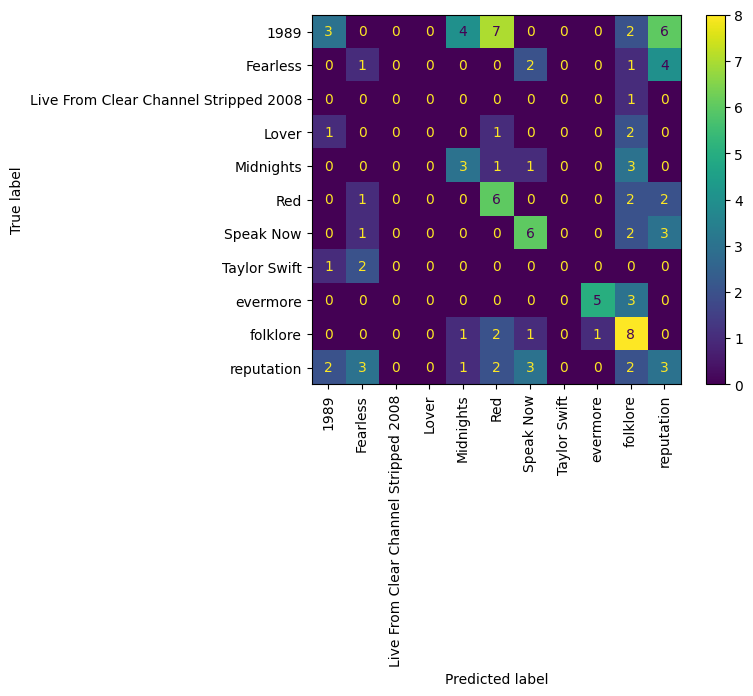

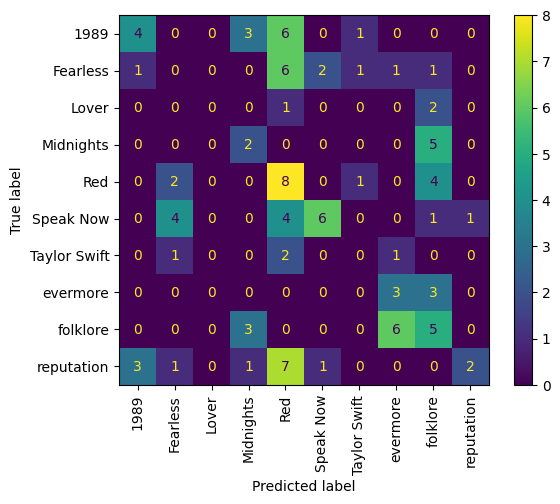

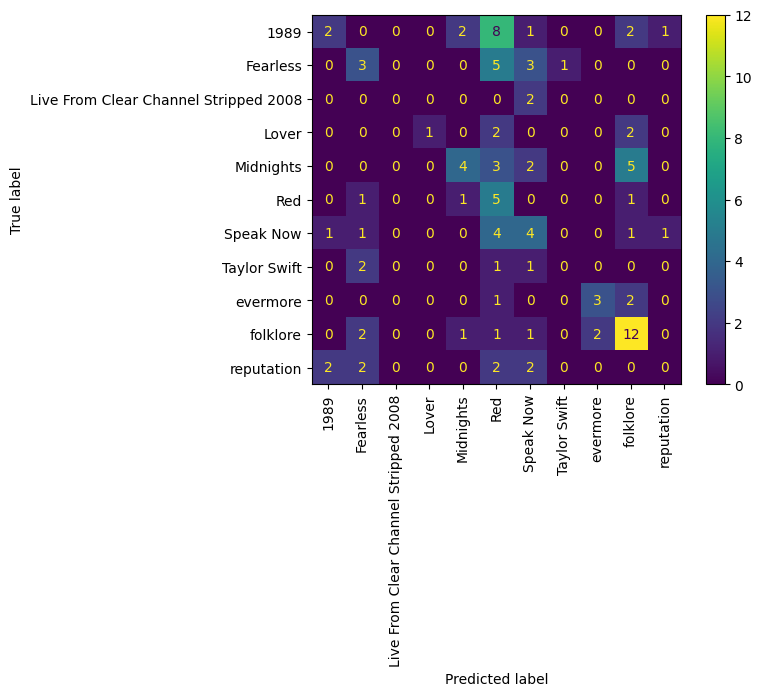

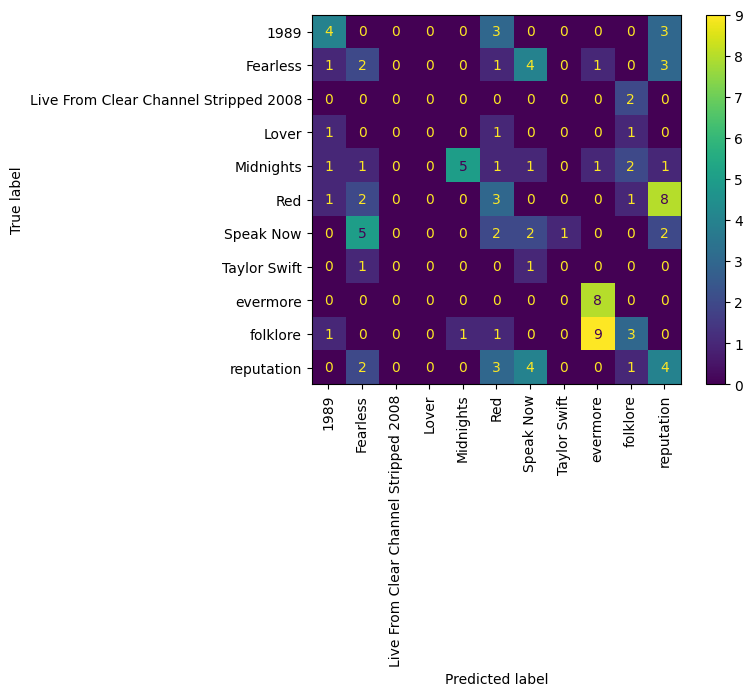

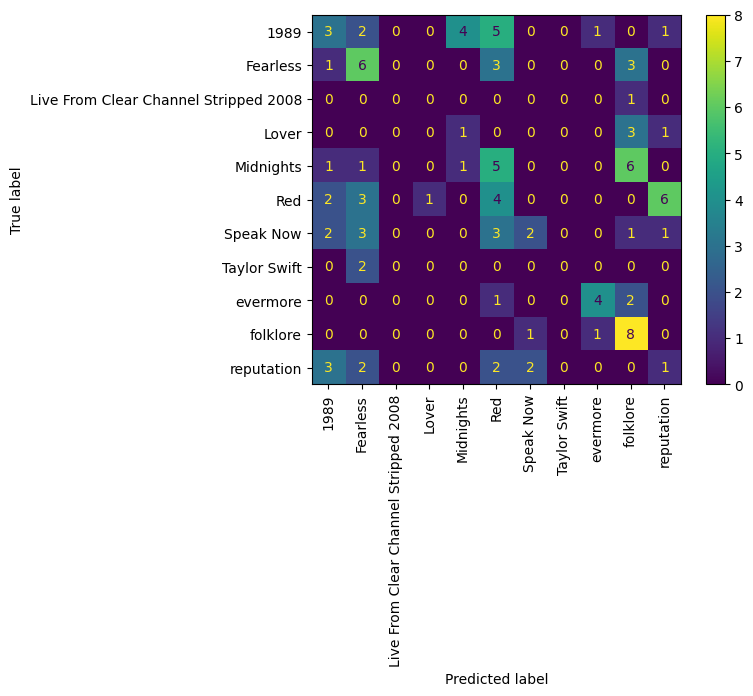

In [34]:
# Display the confusion matrix graphics
# Display and evaluate the confusion matrices
for matrix, matrix_df in zip(nb_confusion_matrices, nb_confusion_matrix_dfs): # Iterate over the dataframes from the matrix too to get album labelsmatrix, display_labels=matrix_df.colu)
    disp = ConfusionMatrixDisplay(matrix, display_labels=matrix_df.columns)
    disp.plot()
    plt.xticks(rotation=90) # Rotate the x-axis labels so that they do not overlap
    plt.show()
    print('\n\n\n\n\n\n')

These initial results show that the NB Classifier performed very poorly on this dataset when compared to the k-NN classifier, with a mean F1 score of only 0.33. This could be primarily due to the fact that the variables do not all follow a Gaussian distribution, thus negatively affecting the Gaussian density estimation of the features' likelihoods. Nonetheless, the confusion matrices show that the same albums (Red, Speak Now and folklore) had higher recall (more true positives over true positives + false negatives) as before. In addition, the similarity between the styles of folklore and evermore is also reflected in the matrices by the frequent misclassifications of one of these albums as the other one.

In [35]:
nb_results = makeResultsTable(nb_classification_reports, 'Naive Bayes')
nb_results.tail(20)

precision  \
Naive Bayes: fold nr 5 evermore                                0.666667   
                       folklore                                0.333333   
                       reputation                              0.100000   
                       accuracy                                0.273585   
                       macro avg                               0.218761   
                       weighted avg                            0.254917   
Naive Bayes: Average   1989                                    0.404603   
                       Fearless                                0.173473   
                       Live From Clear Channel Stripped 2008   0.000000   
                       Lover                                   0.200000   
                       Midnights                               0.411111   
                       Red                                     0.216249   
                       Speak Now                               0.388974   
                       Taylor Swift                            0.000000   
                       accuracy                                0.300000   
                       evermore                                0.558756   
                       folklore                                0.331824   
                       macro avg                               0.269617   
                       reputation                              0.224762   
                       weighted avg                            0.323557   

                                                                recall  \
Naive Bayes: fold nr 5 evermore                               0.571429   
                       folklore                               0.800000   
                       reputation                             0.100000   
                       accuracy                               0.273585   
                       macro avg                              0.237142   
                       weighted avg                           0.273585   
Naive Bayes: Average   1989                                   0.226916   
                       Fearless                               0.200641   
                       Live From Clear Channel Stripped 2008  0.000000   
                       Lover                                  0.040000   
                       Midnights                              0.280495   
                       Red                                    0.430758   
                       Speak Now                              0.308333   
                       Taylor Swift                           0.000000   
                       accuracy                               0.300000   
                       evermore                               0.639286   
                       folklore                               0.520821   
                       macro avg                              0.257997   
                       reputation                             0.141310   
                       weighted avg                           0.300000   

                                                              f1-score  \
Naive Bayes: fold nr 5 evermore                               0.615385   
                       folklore                               0.470588   
                       reputation                             0.100000   
                       accuracy                               0.273585   
                       macro avg                              0.210516   
                       weighted avg                           0.243611   
Naive Bayes: Average   1989                                   0.279269   
                       Fearless                               0.184174   
                       Live From Clear Channel Stripped 2008  0.000000   
                       Lover                                  0.066667   
                       Midnights                              0.318579   
                       Red                 

#### Gaussian Naive Bayes Evaluation

In terms of the overall performance of the model, measured by accuracy (True Positives + True Negatives / All Test Samples), this model performed very poorly with a score of only 0.3. This means only about 30% of the predicted labels were correct ones. Similarly, the average (micro - simplest ratio without weighting) precision, recall and f1 received very low scores of only about 0.4. Therefore, basic Gaussian Naive Bayes is perhaps not the best algorithm for this specific dataset. One way to improve on this score might be to conduct further statistical analysis and data cleaning (i.e. with interquartile range and box plots) to remove outliers from the data points, so that they follow a more normal distribution. Alternative options that could be tried if there were more time to refine this model's performance could also be to [conduct a logarithmic or reciprocal transformation of the features values](https://www.analyticsvidhya.com/blog/2021/05/how-to-transform-features-into-normal-gaussian-distribution/).

### Decision Tree: Hyperparameter Optimization with Grid Search Utility

In [36]:
# Reference: https://plainenglish.io/blog/hyperparameter-tuning-of-decision-tree-classifier-using-gridsearchcv-2a6ebcaffeda#how-does-it-work 
# Reference: https://vitalflux.com/decision-tree-hyperparameter-tuning-grid-search-example/
from sklearn.model_selection import GridSearchCV # Import the Grid Search facility for evaluating different parameters
from sklearn.tree import DecisionTreeClassifier # Import the Decision Tree Classifier from scikit-learn
from sklearn.model_selection import train_test_split

# Split the data into train and test sets for Grid Search hyperparameter tuning
# Use randomstate for reproducible results
X_train, X_test, y_train, y_test = train_test_split(features_matrix, target_array, train_size=0.8, random_state=12) # Do not scale for DT and RF algos

In [ ]:

# To use GridSearch, set up a 'parameter dictionary'
# This is a table formatted as a Python dict, where each key represents the name of the hyperparameter to be selected, and
# each value consists of the list or range of parameters to test. The GridSearch algorithm will then output the combination of hyperparameters
# which resulted in the optimal score. The 'scoring' parameter in GridSearchCV can be set to a string which determines which metric to use
# to evaluate the performance of the model (e.g. f1, accuracy etc.)
# We will try to find the best parameters and the score for the following metrics: 
# Average precision, accuracy, recall, F1 - harmonic mean of precision and recall, in order to compare these to the other algorithms used here.

# Decision Tree takes a lot of parameters, therefore this could take a long time to tune!
params_dict = {
    # The chi-squared split-choosing algorithm is currently not supported by the scikit-learn Decision Tree Classifier
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 20), # choose max depth of tree from 1 to 19
    'min_samples_split': range(2,8), # the nr of samples that have to be in a node to continue splitting
    'min_samples_leaf': range(1, 5), # the nr of samples a node has to have to become a leaf, otherwise its parent becomes the leaf
    # nr of features to consider when looking for the best split --> if sqrt, then max_features = sqrt(nr features), if log2, then log2(nr features)
    #'max_features': ['auto', 'sqrt', 'log2'], 
    'random_state':[12], # Set random stat to allow reproducibility of results
    'max_leaf_nodes': range(2,10), # Restrict nr of leaf nodes. Best nodes are defined as relative reduction in impurity. 
    'ccp_alpha': [0.1, 0.25, 0.5, 0.75] # Parameters for Minimal Cost-Complexity Pruning (post-pruning after tree is grown)
}

# Dict storing the scoring metrics to evaluate grid search parameters with
# 'balanced_accuracy' was created to deal with imbalanced datasets, and represents the average recall for each class
# micro param: Calculate metrics globally by counting the total true positives, false negatives and false positives.

scoring_metrics = {'accuracy':0, 'balanced_accuracy':0, 'precision_micro':0, 'recall_micro':0, 'f1_micro':0}
params_for_metrics = {'accuracy':None, 'balanced_accuracy':None, 'precision_micro':None, 'recall_micro':None, 'f1_micro':None}

# Instantiate the Decision Tree Classifier model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree.predict(X_test)

# Iterate over the different ways of scoring to get optimum params and score for each GridSearch
for metric in scoring_metrics.keys():
    grid = GridSearchCV(
        decision_tree, # the model to find the hyperparameters for
        param_grid=params_dict,
        cv=5, # Use cross-validation with 5 folds to improve generalization of results
        scoring=metric,
        n_jobs=-1,
        verbose=1, # controls how much information to display on the timing and folds
    )
    grid.fit(X_train, y_train)
    print(f"Evaluation metric: {metric}")
    print(f"Best hyperparameters: {grid.best_params_}")
    print(f"Best Score for {metric}: {grid.best_score_}")
    scoring_metrics[metric] = grid.best_score_
    params_for_metrics[metric]=grid.best_params_


In [12]:
# Save scores and optimal hyperparameters as csv file and pickle to enable easy loading next time -->
# This Grid Search took about 20 hours, so it is really difficult given the time constraints to have to run it again

# Convert scores for each metric into pd DataFrame
scoring_metrics_df = pd.DataFrame(list(scoring_metrics.items()), columns=['Metric', 'Score'])
# Save scores for metrics as both csv file and pickle
scoring_metrics_df.to_csv('decision_tree_metrics_for_different_hyperparameters.csv', index=False)
scoring_metrics_df.to_pickle('decision_tree_metrics_for_different_hyperparameters_pickle.pkl')
# Now convert the optimal params into a DataFrame too and save as csv/pickle
params_for_metrics_df = pd.DataFrame(params_for_metrics)
params_for_metrics_df.to_csv('decision_tree_optimal_params_for_metrics.csv', index=False)
params_for_metrics_df.to_pickle('decision_tree_optimal_params_pickle_version.pkl')

In [13]:
# Read in the data after saving
scoring_metrics_df = pd.read_csv('decision_tree_metrics_for_different_hyperparameters.csv')
scoring_metrics_df.head() # Shows the scores for each metric returned by Decision Tree Grid Search

Metric     Score
0           accuracy  0.320756
1  balanced_accuracy  0.218394
2    precision_micro  0.320756
3       recall_micro  0.320756
4           f1_micro  0.320756

In [14]:
# Shows the best parameters found by Grid Search based on each type of scoring metric here
best_params_for_metrics_df = pd.read_csv('decision_tree_optimal_params_for_metrics.csv')
best_params_for_metrics_df.head()

accuracy balanced_accuracy precision_micro recall_micro f1_micro
0      0.1               0.1             0.1          0.1      0.1
1  entropy           entropy         entropy      entropy  entropy
2        4                 4               4            4        4
3        6                 6               6            6        6
4        1                 1               1            1        1

In [15]:
# Restructure the Scores table using 'pivot_table' method to turn the Metric column's values into the column names
# This is done so that the two tables can be concatenated (stacked vertically) together
# Ref: https://www.codium.ai/blog/pandas-pivot-tables-a-comprehensive-guide-for-data-science/#:~:text=The%20pivot()%20function%20is,and%20a%20specified%20values%20column.

pivoted_scoring_metrics_df = scoring_metrics_df.pivot_table(
    index=None, # Determines the column to use as the index of the new DataFrame
    columns='Metric', # Determines which column to spread out into separate columns for each value
    values=['Score'] # Determines the cell values for the restructured DataFrame
)
# Show the new structure of Scores table
pivoted_scoring_metrics_df 

Metric  accuracy  balanced_accuracy  f1_micro  precision_micro  recall_micro
Score   0.320756           0.218394  0.320756         0.320756      0.320756

In [17]:
# Index for dataframe showing optimal hyperparams
hyperparams_index = [
    'ccp_alpha',
    'criterion',
    'max_depth',
    'max_leaf_nodes',
    'min_samples_leaf',
    'min_samples_split',
    'random_state'
]

# Now we have the list of hyperparameter names, set this as the index (row names) for the optimal hyperparameters DataFrame
best_params_for_metrics_df['hyperparameters'] = hyperparams_index
best_params_for_metrics_df.set_index('hyperparameters', inplace=True)
best_params_for_metrics_df.head(10) # Showcase new dataframe with hyperparam name index

accuracy balanced_accuracy precision_micro recall_micro  \
hyperparameters                                                             
ccp_alpha              0.1               0.1             0.1          0.1   
criterion          entropy           entropy         entropy      entropy   
max_depth                4                 4               4            4   
max_leaf_nodes           6                 6               6            6   
min_samples_leaf         1                 1               1            1   
min_samples_split        2                 2               2            2   
random_state            12                12              12           12   

                  f1_micro  
hyperparameters             
ccp_alpha              0.1  
criterion          entropy  
max_depth                4  
max_leaf_nodes           6  
min_samples_leaf         1  
min_samples_split        2  
random_state            12

In [18]:
# Concatenate the optimal hyperparams df with the single-row scores df
decision_tree_grid_search_results = pd.concat([
    best_params_for_metrics_df,
    pivoted_scoring_metrics_df],
    axis=0 # Concatenate vertically (adding a row not a col)
)
decision_tree_grid_search_results.head(10)

accuracy balanced_accuracy precision_micro recall_micro  \
ccp_alpha               0.1               0.1             0.1          0.1   
criterion           entropy           entropy         entropy      entropy   
max_depth                 4                 4               4            4   
max_leaf_nodes            6                 6               6            6   
min_samples_leaf          1                 1               1            1   
min_samples_split         2                 2               2            2   
random_state             12                12              12           12   
Score              0.320756          0.218394        0.320756     0.320756   

                   f1_micro  
ccp_alpha               0.1  
criterion           entropy  
max_depth                 4  
max_leaf_nodes            6  
min_samples_leaf          1  
min_samples_split         2  
random_state             12  
Score              0.320756

This table clearly communicates several important observations:
1. The optimal hyperparameters were the same regardless of the scoring metric used, with 0.1 for the minimal-cost complexity pruning constant (alpha), 'entropy' as the best split-deciding algorithm, as well as the same values for the other hyperparameters such as max_depth. Therefore, we will now run the DecisionTreeClassifier using these optimized hyperparameters by fitting the model on a train and test set (using a simple holdout set without cross-validation, as the hyperparameters have already been determined through GridSearch).
2. The Decision Tree did not seem to perform particular well on this task, compared to the weighted K-Nearest Neighbour algorithm. It's metrics hover around 0.3 which is similar to the results for the Naive Bayes model. The next stage will involve training the data on a Random Forest to see if the results can be improved.

In [37]:
# Cross-validation for decision tree running with optimal hyperparams
# Runs cross-validation on 'nr_folds' input parameter permutations of train-test data.
def DecisionTree_CrossValidation(X, y, nr_folds,
                                       _ccp_alpha=0.1,
                                       _criterion='entropy',
                                       _max_depth=4,
                                       _max_leaf_nodes=6,
                                       _min_samples_leaf=1,
                                       _min_samples_split=2
                                      ):
    # Store f1 scores for each fold
    f1_scores = []
    # Confusion matrix for each fold
    confusion_matrices = []
    # Confusion matrix DataFrame with album labels for each fold
    confusion_matrix_dfs = []
    # Classification reports per fold
    classification_reports = []
    # Cross-validate by dividing data into different train-test splits 'nr__folds' times...
    for i in range(nr_folds):
        # Create the new combination of train-test data for this fold
        X_train, y_train, X_test, y_test = createFold(X, y)
        # Instantiate the model
        dt = DecisionTreeClassifier(
                    ccp_alpha=_ccp_alpha,
                    criterion=_criterion,
                    max_depth=_max_depth,
                    max_leaf_nodes=_max_leaf_nodes,
                    min_samples_leaf=_min_samples_leaf,
                    min_samples_split=_min_samples_split
                )
        # Fit the training data
        dt.fit(np.array(X_train), np.array(y_train))
        # Make the predictions
        y_pred = dt.predict(X_test)
        # Store the f1 score for each fold
        f1 = f1_score(y_test, y_pred, average='micro')
        f1_scores.append(f1)
        # Store the album names in order from the target array, to use for confusion matrix
        album_names = np.unique(y_test)
        # Create confusion matrix for this fold:
        c_matrix = confusion_matrix(y_test, y_pred, labels=album_names)
        confusion_matrices.append(c_matrix)
        confusion_matrix_dfs.append(pd.DataFrame(c_matrix, index=album_names, columns=album_names))
        # Get the sklearn classification report summary from sklearn
        classif_report = classification_report(
            y_test,
            y_pred,
            output_dict=True, # Convert to dictionary
            labels=album_names,
            target_names=album_names,
            zero_division=0.0,) # If divide by 0, set metric to 0
        classification_reports.append(classif_report)
    return np.array(f1_scores), confusion_matrices, confusion_matrix_dfs, classification_reports

dt_f1_scores_per_fold, dt_confusion_matrices, dt_confusion_matrix_dfs, dt_classification_reports = DecisionTree_CrossValidation(
                                                                                np.array(features_matrix), 
                                                                                np.array(target_array),
                                                                                5 # 4 folds
                                                                            )
print(f"F1 scores: {dt_f1_scores_per_fold}")
print(f"Mean F1 score: {dt_f1_scores_per_fold.mean()}")


F1 scores: [0.28301887 0.27358491 0.33018868 0.33962264 0.26415094]
Mean F1 score: 0.2981132075471698


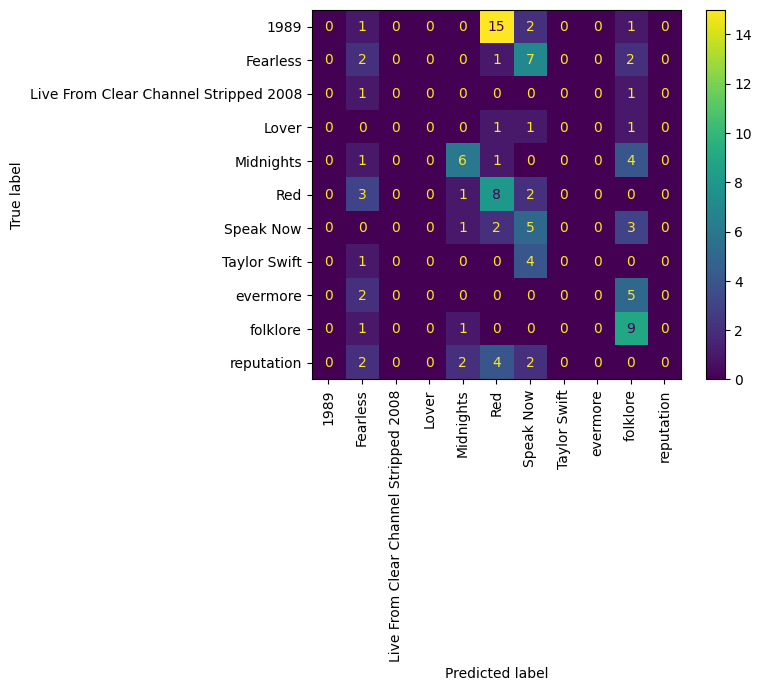

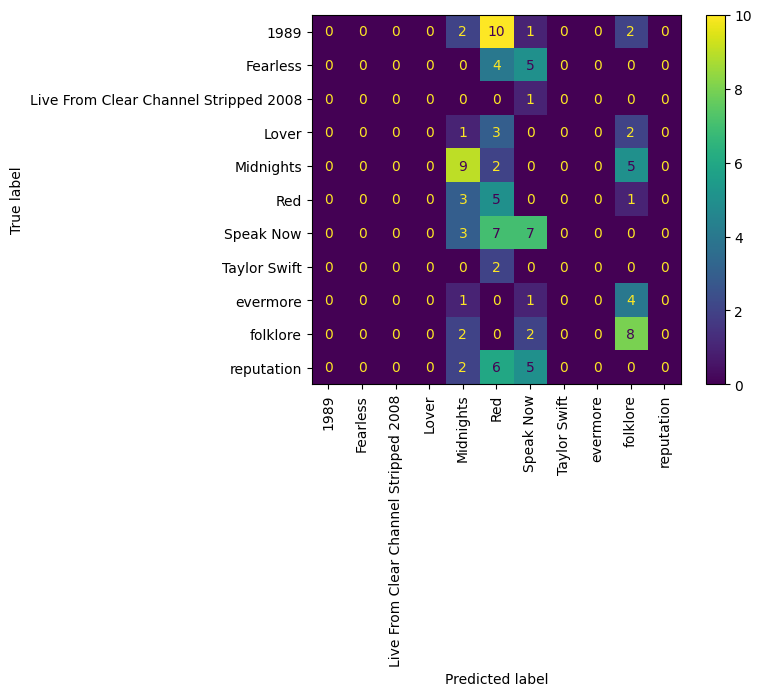

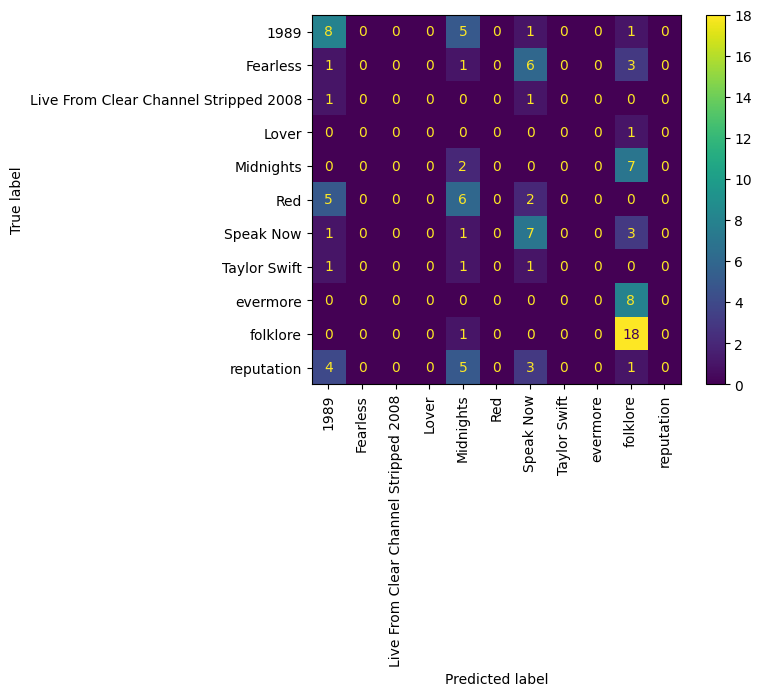

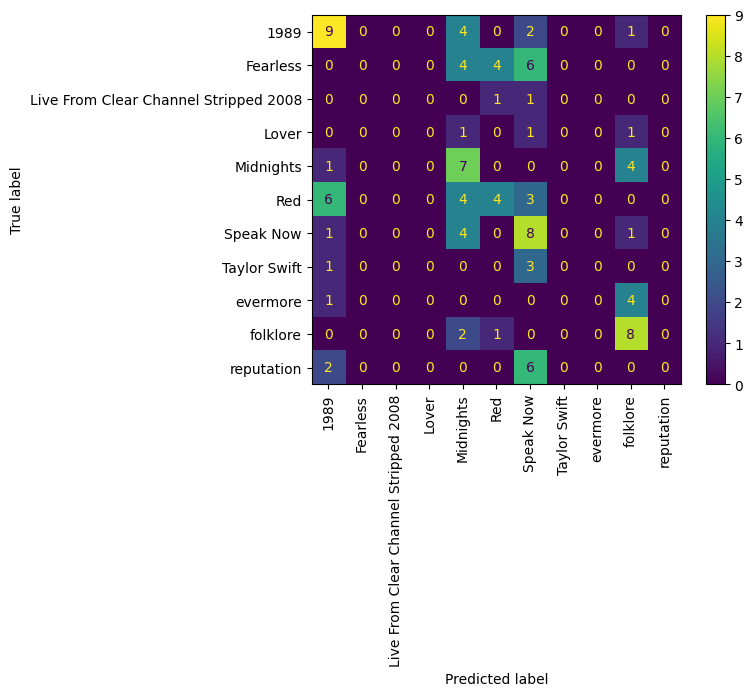

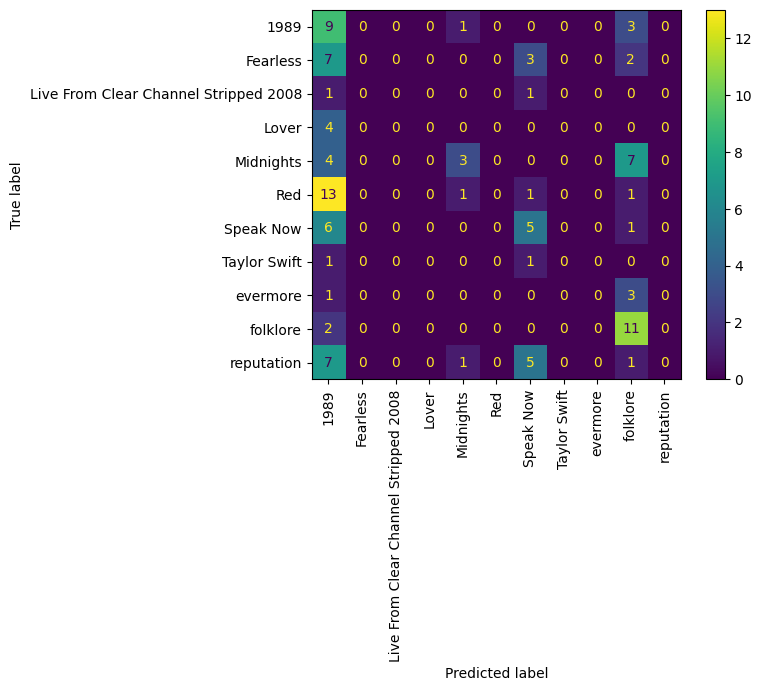

In [38]:
# Display the confusion matrix graphics
# Display and evaluate the confusion matrices
for matrix, matrix_df in zip(dt_confusion_matrices, dt_confusion_matrix_dfs): # Iterate over the dataframes from the matrix too to get album labelsmatrix, display_labels=matrix_df.colu)
    disp = ConfusionMatrixDisplay(matrix, display_labels=matrix_df.columns)
    disp.plot()
    plt.xticks(rotation=90) # Rotate the x-axis labels so that they do not overlap
    plt.show()
    print('\n\n\n\n\n\n')

In [39]:
dt_results = makeResultsTable(dt_classification_reports, 'Decision Tree')
dt_results.head(80)

precision  \
Decision Tree: fold nr 1 1989                                    0.000000   
                         Fearless                                0.142857   
                         Live From Clear Channel Stripped 2008   0.000000   
                         Lover                                   0.000000   
                         Midnights                               0.545455   
...                                                                   ...   
Decision Tree: Average   Red                                     0.155641   
                         Speak Now                               0.289615   
                         Taylor Swift                            0.000000   
                         accuracy                                0.298113   
                         evermore                                0.000000   

                                                                  recall  \
Decision Tree: fold nr 1 1989                                   0.000000   
                         Fearless                               0.166667   
                         Live From Clear Channel Stripped 2008  0.000000   
                         Lover                                  0.000000   
                         Midnights                              0.500000   
...                                                                  ...   
Decision Tree: Average   Red                                    0.272456   
                         Speak Now                              0.487548   
                         Taylor Swift                           0.000000   
                         accuracy                               0.298113   
                         evermore                               0.000000   

                                                                f1-score  \
Decision Tree: fold nr 1 1989                                   0.000000   
                         Fearless                               0.153846   
                         Live From Clear Channel Stripped 2008  0.000000   
                         Lover                                  0.000000   
                         Midnights                              0.521739   
...                                                                  ...   
Decision Tree: Average   Red                                    0.170491   
                         Speak Now                              0.359623   
                         Taylor Swift                           0.000000   
                         accuracy                               0.298113   
                         evermore                               0.000000   

                                                                  support  
Decision Tree: fold nr 1 1989                                   19.000000  
                         Fearless                               12.000000  
                         Live From Clear Channel Stripped 2008   2.000000  
                         Lover                                   3.000000  
                         Midnights                              12.000000  
...                                                                   ...  
Decision Tree: Average   Red                                    13.800000  
                         Speak Now                              13.200000  
                         Taylor Swift                            3.200000  
                         accuracy                                0.298113  
                         evermore                                6.000000  

[80 rows x 4 columns]

This table shows that the decision tree classifier performed very badly on this dataset. The accuracy was only 0.32 and the other scores such as precision were very low as well, despite testing on multiple folds to try to get a generalizable result. As optimal hyperparameters have been honed using GridSearch, another [option to improve the performance of a decision tree](https://explorium.ai/blog/machine-learning/the-complete-guide-to-decision-trees/#:~:text=The%20biggest%20issue%20of%20decision,it%20loses%20its%20generalization%20capabilities.) is to prune the features in order to remove those which are less important. The Decision Tree class provides a utility called 'feature_importances_' that lets you do this:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_matrix, target_array, train_size=0.8)

dt = DecisionTreeClassifier(
   ccp_alpha=0.1,
   criterion='entropy',
   max_depth=4,
   max_leaf_nodes=6,
   min_samples_leaf=1,
   min_samples_split=2
)

dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)
for feature, importance in zip(feature_names, dt.feature_importances_):
    print(f"Feature: {feature} --> Importance: {importance}")

This shows that 'acousticness' and 'liveness' were the most important features for the decision tree splits. As a result, we can train the decision tree using only these features and compare the performance of the classifier:

In [ ]:
pruned_features = features_matrix[['acousticness', 'liveness']]

In [55]:
pruned_features

acousticness  liveness
0        0.009420    0.3670
1        0.088500    0.1680
2        0.000421    0.0899
3        0.000537    0.3850
4        0.000656    0.1310
..            ...       ...
525      0.111000    0.3290
526      0.004520    0.1030
527      0.637000    0.1470
528      0.003490    0.1280
529      0.040200    0.0863

[530 rows x 2 columns]

In [75]:
# Run DT algorithm again, using only these features...
dt_f1_scores_per_fold_pruned, dt_confusion_matrices_pruned, dt_confusion_matrix_dfs_pruned, dt_classification_reports_pruned = DecisionTree_CrossValidation(
                                                                                np.array(pruned_features), 
                                                                                np.array(target_array),
                                                                                5
                                                                            )
print(f"F1 scores: {dt_f1_scores_per_fold_pruned}")
print(f"Mean F1 score: {dt_f1_scores_per_fold_pruned.mean()}")

F1 scores: [0.23584906 0.16981132 0.24528302 0.33018868 0.26415094]
Mean F1 score: 0.2490566037735849


Unfortunately, this technique did not really improve the performance of the decision tree, with the f1 scores combining precision and recall still being extremely low. Therefore, we can conclude that the Decision Tree classifier is really not a well-suited algorithm for categorizing these songs into album classes. The next step of this study will be to try to improve this result using a Random Forest Classifier, which trains many decision trees and outputs the majority prediction for the label.

### Random Forest Classifier

In [13]:
# Reference: https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/

from sklearn.ensemble import RandomForestClassifier # Import the classifier!
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Set params dict for GridSearch optimal parameter tuning
rf_params_dict  = {
    'max_depth': np.arange(2, 10), # Restricts the longest path from root to leaf decision trees should have.
    'min_samples_leaf': np.arange(2, 15), # Minimum samples required to become a leaf in a decision tree.
    'n_estimators': np.arange(5, 55, 5) # Number of decision trees to use in the ensemble: 5, 10, 15... up until 50 (inclusive).
}

# Create the model to tune (the 'estimator') --> RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Instantiate the grid search with f1 recall-precision mean score
grid = GridSearchCV(
        rf, # the model to find the hyperparameters for
        param_grid=rf_params_dict,
        cv=4, # Use cross-validation with 5 folds to improve generalization of results
        n_jobs=-1, # Use all the CPU cores to parallelize operations as this is a VERY slow process! RandomForests take time....
        verbose=1, # controls how much information to display on the timing and folds
        scoring='f1_micro'
    )

X_train, X_test, y_train, y_test = train_test_split(features_matrix, target_array, train_size=0.8, random_state=12)
grid.fit(X_train, y_train)
print(f"Best params: {grid.best_params_}")
print(f"Best f1 score: {grid.best_score_}")



Fitting 4 folds for each of 1040 candidates, totalling 4160 fits
Best params: {'max_depth': 9, 'min_samples_leaf': 2, 'n_estimators': 50}
Best f1 score: 0.5966981132075471


In [42]:
# Now train the Random Forest classifier on the X_train data using the optimal parameters...

rf_classifier = RandomForestClassifier(n_jobs=-1, max_depth=9,
                                       n_estimators=50, 
                                       min_samples_leaf=2,
                                       oob_score=True) # Reference https://www.analyticsvidhya.com/blog/2022/11/out-of-bag-oob-score-for-bagging-in-data-science/#:~:text=The%20prediction%20error%20on%20that,score%20for%20the%20bottom%20model.
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, min_samples_leaf=2, n_estimators=50,
                       n_jobs=-1, oob_score=True)

In [43]:
# Print 'out-of-bag' score ('The OOB score is the number of correctly predicted data on OOB samples taken for validation.')
# Basically the oob score is the validation/test-set score the collection of decision trees output after testing their predictions
# on the data points not included in the 'training set' or bootstrapping samples
rf_classifier_oob_score = rf_classifier.oob_score_
print(rf_classifier_oob_score)

0.5849056603773585


In [44]:
rf_y_pred = rf_classifier.predict(X_test)


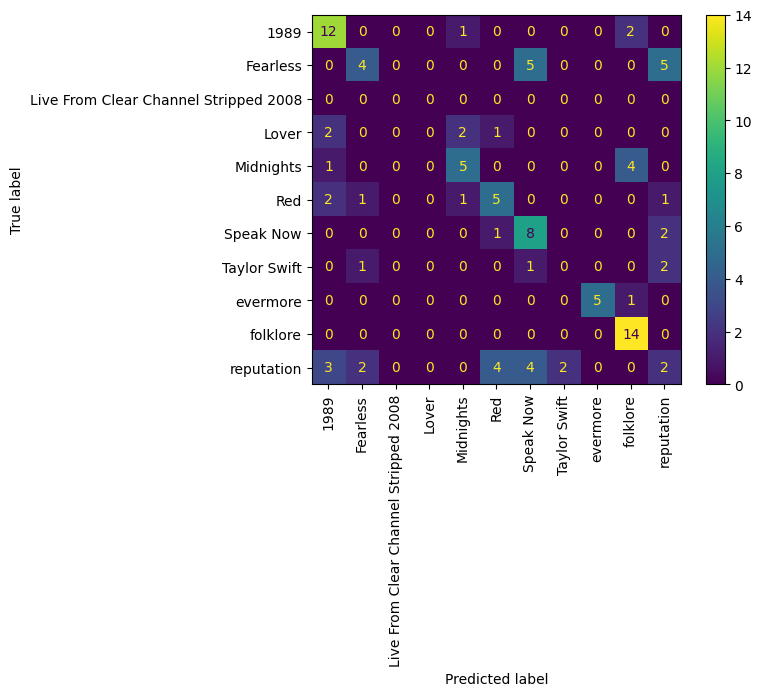

In [45]:
# Get the order of as they appear in the test set from the Random Forest model 'classes_' property
rf_album_names_in_order = rf_classifier.classes_
# Create confusion matrix to show correct and incorrect classifications for each album class
rf_c_matrix = confusion_matrix(y_test, rf_y_pred, labels=rf_album_names_in_order)
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(rf_c_matrix , display_labels=rf_album_names_in_order)
disp.plot()
plt.xticks(rotation=90) # Rotate the x-axis labels so that they do not overlap
plt.show()

Similarly to the other classifiers, the folklore, 1989 and Speak Now albums have the best recall, while reputation, Lover and Fearless are often misclassified.

In [46]:
# Create classifciation report to compare with the others
rt_classif_report = classification_report(
            y_test,
            rf_y_pred,
            output_dict=True, # Convert to dictionary
            labels=rf_album_names_in_order,
            target_names=rf_album_names_in_order,
            zero_division=0.0,)
rt_classif_report

{'1989': {'precision': 0.6,
  'recall': 0.8,
  'f1-score': 0.6857142857142857,
  'support': 15.0},
 'Fearless': {'precision': 0.5,
  'recall': 0.2857142857142857,
  'f1-score': 0.36363636363636365,
  'support': 14.0},
 'Live From Clear Channel Stripped 2008': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 0.0},
 'Lover': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 5.0},
 'Midnights': {'precision': 0.5555555555555556,
  'recall': 0.5,
  'f1-score': 0.5263157894736842,
  'support': 10.0},
 'Red': {'precision': 0.45454545454545453,
  'recall': 0.5,
  'f1-score': 0.47619047619047616,
  'support': 10.0},
 'Speak Now': {'precision': 0.4444444444444444,
  'recall': 0.7272727272727273,
  'f1-score': 0.5517241379310345,
  'support': 11.0},
 'Taylor Swift': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 4.0},
 'evermore': {'precision': 1.0,
  'recall': 0.8333333333333334,
  'f1-score': 0.9090909090909091,
  'support': 6.0},
 'folklore':

In [47]:
# Convert into DataFrame and add Multi-Index like for the other entries for other models
rf_report_df = pd.DataFrame(rt_classif_report).transpose()
# Create multi-index
model_index = pd.MultiIndex.from_product([['Random Forest'], df.index], names=['model', 'album'])
# Setting the MultiIndex to the DataFrame using concat function
# Create multi-index with a single level
model_index = pd.MultiIndex.from_product([['Random Forest']], names=['model'])
# Set the MultiIndex to the DataFrame
rf_report_df.index = pd.MultiIndex.from_product([['Random Forest'], rf_report_df.index], names=['model', 'album'])
rf_report_df.head(20)

precision    recall  \
model         album                                                        
Random Forest 1989                                    0.600000  0.800000   
              Fearless                                0.500000  0.285714   
              Live From Clear Channel Stripped 2008   0.000000  0.000000   
              Lover                                   0.000000  0.000000   
              Midnights                               0.555556  0.500000   
              Red                                     0.454545  0.500000   
              Speak Now                               0.444444  0.727273   
              Taylor Swift                            0.000000  0.000000   
              evermore                                1.000000  0.833333   
              folklore                                0.666667  1.000000   
              reputation                              0.166667  0.117647   
              micro avg                               0.518868  0.518868   
              macro avg                               0.398898  0.433088   
              weighted avg                            0.463741  0.518868   

                                                     f1-score  support  
model         album                                                     
Random Forest 1989                                   0.685714     15.0  
              Fearless                               0.363636     14.0  
              Live From Clear Channel Stripped 2008  0.000000      0.0  
              Lover                                  0.000000      5.0  
              Midnights                              0.526316     10.0  
              Red                                    0.476190     10.0  
              Speak Now                              0.551724     11.0  
              Taylor Swift                           0.000000      4.0  
              evermore                               0.909091      6.0  
              folklore                               0.800000     14.0  
              reputation                             0.137931     17.0  
              micro avg                              0.518868    106.0  
              macro avg                              0.404600    106.0  
              weighted avg                           0.476132    106.0

In [54]:
# get accuracy score for random forest
from sklearn.metrics import accuracy_score
rf_acc = accuracy_score(y_test,rf_y_pred)
print(rf_acc)

0.5188679245283019


Looking at these results, the accuracy is close to 0.6 which means that the model performs better than guessing labels randomly, and shows an improvement on the decision tree classifier, which was to be expected. However, some albums (the same ones which keep being classified correctly more often throughout this study) have a recall score of 0.75 or 0.8, but some are very difficult to classify such as Lover or reputation. These findings have been similar across the models and will be reflected upon in more detail in the report.

## Putting the Tables Together for Comparison

In [48]:
# Using .loc to select rows with the last MultiIndex label
knn_avg = knn_table.loc['kNN: Average']
# Set the MultiIndex to the DataFrame
knn_avg.index = pd.MultiIndex.from_product([['k-NN'], knn_avg.index], names=['model', 'album'])
knn_avg

precision    recall  f1-score  \
model album                                                                  
k-NN  1989                                    0.691312  0.750247  0.711547   
      Fearless                                0.483077  0.513575  0.492092   
      Live From Clear Channel Stripped 2008   0.100000  0.100000  0.100000   
      Lover                                   0.250000  0.201905  0.207792   
      Midnights                               0.713846  0.820513  0.756777   
      Red                                     0.598350  0.634839  0.604687   
      Speak Now                               0.761386  0.634957  0.667866   
      Taylor Swift                            0.000000  0.000000  0.000000   
      accuracy                                0.579245  0.579245  0.579245   
      evermore                                0.784740  0.771111  0.758291   
      folklore                                0.718494  0.781962  0.746243   
      macro avg                               0.475872  0.485440  0.470015   
      reputation                              0.133389  0.130736  0.124868   
      weighted avg                            0.571668  0.579245  0.564268   

                                                support  
model album                                              
k-NN  1989                                    14.400000  
      Fearless                                12.200000  
      Live From Clear Channel Stripped 2008    1.600000  
      Lover                                    4.200000  
      Midnights                                9.200000  
      Red                                     15.200000  
      Speak Now                               11.200000  
      Taylor Swift                             3.400000  
      accuracy                                 0.579245  
      evermore                                 7.200000  
      folklore                                15.200000  
      macro avg                              106.000000  
      reputation                              12.200000  
      weighted avg                           106.000000

In [49]:
# Do the same for Naive Bayes, Decision Tree and Random Forest...
nb_avg = nb_results.loc['Naive Bayes: Average']
# Set the MultiIndex to the DataFrame
nb_avg.index = pd.MultiIndex.from_product([['Naive Bayes'], nb_avg.index], names=['model', 'album'])
nb_avg

precision    recall  \
model       album                                                        
Naive Bayes 1989                                    0.404603  0.226916   
            Fearless                                0.173473  0.200641   
            Live From Clear Channel Stripped 2008   0.000000  0.000000   
            Lover                                   0.200000  0.040000   
            Midnights                               0.411111  0.280495   
            Red                                     0.216249  0.430758   
            Speak Now                               0.388974  0.308333   
            Taylor Swift                            0.000000  0.000000   
            accuracy                                0.300000  0.300000   
            evermore                                0.558756  0.639286   
            folklore                                0.331824  0.520821   
            macro avg                               0.269617  0.257997   
            reputation                              0.224762  0.141310   
            weighted avg                            0.323557  0.300000   

                                                   f1-score  support  
model       album                                                     
Naive Bayes 1989                                   0.279269     15.6  
            Fearless                               0.184174     11.4  
            Live From Clear Channel Stripped 2008  0.000000      1.5  
            Lover                                  0.066667      4.0  
            Midnights                              0.318579     11.2  
            Red                                    0.276332     13.0  
            Speak Now                              0.329535     12.8  
            Taylor Swift                           0.000000      3.0  
            accuracy                               0.300000      0.3  
            evermore                               0.564132      7.0  
            folklore                               0.390403     14.2  
            macro avg                              0.236379    106.0  
            reputation                             0.145453     12.6  
            weighted avg                           0.280402    106.0

In [50]:
dt_avg = dt_results.loc['Decision Tree: Average']
# Set the MultiIndex to the DataFrame
dt_avg.index = pd.MultiIndex.from_product([['Decision Tree'], dt_avg.index], names=['model', 'album'])
dt_avg

precision    recall  \
model         album                                                        
Decision Tree 1989                                    0.194632  0.357628   
              Fearless                                0.028571  0.033333   
              Live From Clear Channel Stripped 2008   0.000000  0.000000   
              Lover                                   0.000000  0.000000   
              Midnights                               0.359380  0.416468   
              Red                                     0.155641  0.272456   
              Speak Now                               0.289615  0.487548   
              Taylor Swift                            0.000000  0.000000   
              accuracy                                0.298113  0.298113   
              evermore                                0.000000  0.000000   
              folklore                                0.387745  0.801129   
              macro avg                               0.128689  0.215324   
              reputation                              0.000000  0.000000   
              weighted avg                            0.182797  0.298113   

                                                     f1-score     support  
model         album                                                        
Decision Tree 1989                                   0.239127   15.600000  
              Fearless                               0.030769   11.600000  
              Live From Clear Channel Stripped 2008  0.000000    1.800000  
              Lover                                  0.000000    3.400000  
              Midnights                              0.356146   12.600000  
              Red                                    0.170491   13.800000  
              Speak Now                              0.359623   13.200000  
              Taylor Swift                           0.000000    3.200000  
              accuracy                               0.298113    0.298113  
              evermore                               0.000000    6.000000  
              folklore                               0.520876   13.200000  
              macro avg                              0.152458  106.000000  
              reputation                             0.000000   11.600000  
              weighted avg                           0.214416  106.000000

In [51]:
overall_results = pd.concat([knn_avg, nb_avg, dt_avg, rf_report_df ])

In [52]:
overall_results

precision    recall  \
model         album                                                        
k-NN          1989                                    0.691312  0.750247   
              Fearless                                0.483077  0.513575   
              Live From Clear Channel Stripped 2008   0.100000  0.100000   
              Lover                                   0.250000  0.201905   
              Midnights                               0.713846  0.820513   
              Red                                     0.598350  0.634839   
              Speak Now                               0.761386  0.634957   
              Taylor Swift                            0.000000  0.000000   
              accuracy                                0.579245  0.579245   
              evermore                                0.784740  0.771111   
              folklore                                0.718494  0.781962   
              macro avg                               0.475872  0.485440   
              reputation                              0.133389  0.130736   
              weighted avg                            0.571668  0.579245   
Naive Bayes   1989                                    0.404603  0.226916   
              Fearless                                0.173473  0.200641   
              Live From Clear Channel Stripped 2008   0.000000  0.000000   
              Lover                                   0.200000  0.040000   
              Midnights                               0.411111  0.280495   
              Red                                     0.216249  0.430758   
              Speak Now                               0.388974  0.308333   
              Taylor Swift                            0.000000  0.000000   
              accuracy                                0.300000  0.300000   
              evermore                                0.558756  0.639286   
              folklore                                0.331824  0.520821   
              macro avg                               0.269617  0.257997   
              reputation                              0.224762  0.141310   
              weighted avg                            0.323557  0.300000   
Decision Tree 1989                                    0.194632  0.357628   
              Fearless                                0.028571  0.033333   
              Live From Clear Channel Stripped 2008   0.000000  0.000000   
              Lover                                   0.000000  0.000000   
              Midnights                               0.359380  0.416468   
              Red                                     0.155641  0.272456   
              Speak Now                               0.289615  0.487548   
              Taylor Swift                            0.000000  0.000000   
              accuracy                                0.298113  0.298113   
              evermore                                0.000000  0.000000   
              folklore                                0.387745  0.801129   
              macro avg                               0.128689  0.215324   
              reputation                              0.000000  0.000000   
              weighted avg                            0.182797  0.298113   
Random Forest 1989                                    0.600000  0.800000   
              Fearless                                0.500000  0.285714   
              Live From Clear Channel Stripped 2008   0.000000  0.000000   
              Lover                                   0.000000  0.000000   
              Midnights                               0.555556  0.500000   
              Red                                     0.454545  0.500000   
              Speak Now                               0.444444  0.727273   
              Taylor Swift                            0.000000  0.000000   
              evermore                                1.000000  0.833333   
              folklore   

In [56]:
# Save the results
overall_results.to_csv('overall_results.csv', index=True, header=True)

In [2]:
overall_results = pd.read_csv('overall_results.csv')

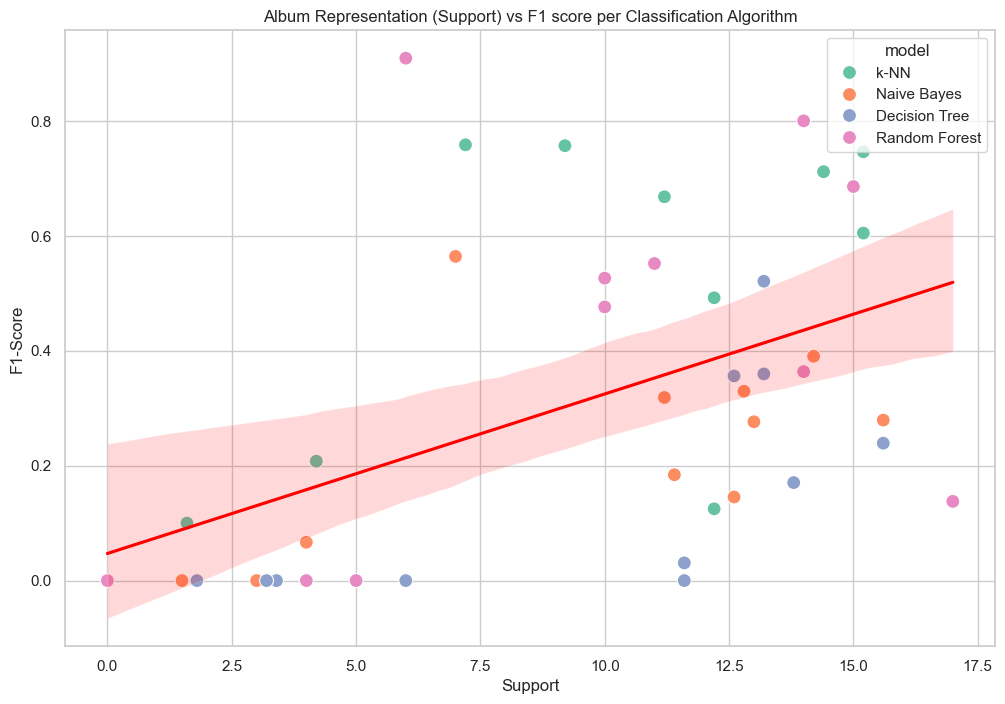

In [17]:
# Use seaborn to plot support (number of instances of the album for that sample) against f1 score
# Filter DataFrame to contain only album names
album_names = ['1989', 'Fearless', 'Live From Clear Channel Stripped 2008', 'Lover',
                 'Midnights', 'Red', 'Speak Now', 'Taylor Swift', 'evermore', 'folklore', 'reputation']
# Apply Boolean mask to only get rows corresponding to real album names, not 'accuracy' or 'weighted avg' etc.
only_albums_df = overall_results[overall_results['album'].isin(album_names)]

# Set the style for better visualization
sns.set(style="whitegrid")# Plot using seaborn
# Create a plot
plt.figure(figsize=(12, 8))
# Create scatterplot showing support (nr of instances of an album) against f1-score
sns.scatterplot(data=only_albums_df, x='support', y='f1-score', hue='model', palette='Set2', s=100)
# Add a linear regression line to further clarify the relationship
sns.regplot(data=only_albums_df, x='support', y='f1-score', scatter=False, color='red')
# Add labels
plt.xlabel('Support')
plt.ylabel('F1-Score')
plt.title('Album Representation (Support) vs F1 score per Classification Algorithm')
# Show the plot
plt.show()

## References for Jupyter Notebook and Coding the Machine Learning Algorithms

*Last accessed the functioning websites on 2 January 2024*

- Bhardwaj, C. A., Mishra, M., & Desikan, K. (2017). Dynamic Feature Scaling for K-Nearest Neighbor Algorithm. International Conference on Mathematical Computer Engineering.
- Codium AI. (2023, July 19). Pandas Pivot Tables: A Comprehensive Guide for Data Science. Retrieved from Codium AI: https://www.codium.ai/blog/pandas-pivot-tables-a-comprehensive-guide-for-data-science/#:~:text=The%20pivot()%20function%20is,and%20a%20specified%20values%20column.
datagy. (2021, September 26).
- Python: Get Dictionary Key with the Max Value (4 Ways). Retrieved from datagy: https://datagy.io/python-get-dictionary-key-with-max-value/#:~:text=The%20simplest%20way%20to%20get,maximum%20value%20of%20any%20iterable.&text=What%20we%20can%20see%20here,max%20value%20of%20that%20iterable.
- Deepanshi. (2022, August 26). How to transform features into Normal/Gaussian Distribution. Retrieved from Analytics Vidhya: https://www.analyticsvidhya.com/blog/2021/05/how-to-transform-features-into-normal-gaussian-distribution/
- explorium. (2023, August 6). The Complete Guide to Decision Tree Analysis. Retrieved from Explorium: https://www.explorium.ai/blog/machine-learning/the-complete-guide-to-decision-trees/#:~:text=The%20biggest%20issue%20of%20decision,it%20loses%20its%20generalization%20capabilities.
- Frei, L. (2019, January 28). Machine Learning From Scratch: kNN. Retrieved from Medium: Lukas Frei: https://medium.com/lukasfrei/machine-learning-from-scratch-knn-b018eaab53e3
- Geeks for Geeks. (2022, December 19). numpy.argsort() in Python. Retrieved from Geeks for Geeks: https://www.geeksforgeeks.org/numpy-argsort-in-python/
- Geeks for Geeks. (2023, November 13). Gaussian Naive Bayes. Retrieved from Geeks for Geeks: https://www.geeksforgeeks.org/gaussian-naive-bayes/
- Huilgol, P. (2019, August 24). Accuracy vs. F1-Score. Retrieved from Medium: Analytics Vidhya: https://medium.com/analytics-vidhya/accuracy-vs-f1-score-6258237beca2#:~:text=Accuracy%20can%20be%20used%20when,to%20evaluate%20our%20model%20on.
- Inside Learning Machines. (n.d.). Implement The KNN Algorithm In Python From Scratch. Retrieved from Inside Learning Machines: https://insidelearningmachines.com/knn_algorithm_in_python_from_scratch/
- Kumar, A. (2022, October 7). Pandas: Creating Multiindex Dataframe from Product or Tuples. Retrieved from Analytics Yogi: https://vitalflux.com/pandas-creating-multiindex-dataframe-from-product-or-tuples/#:~:text=Create%20MultiIndex%20Dataframe%20using%20Product,each%20iterable%20in%20the%20input.
- Lanhenke, M. (2021, December 22). Implementing Naive Bayes From Scratch. Retrieved from Towards Data Science: towardsdatascience.com/implementing-naive-bayes-from-scratch-df5572e042ac
- Păpăluță, V. (2020, February 13). How to implement a Gaussian Naive Bayes Classifier in Python from scratch? Retrieved from Towards Data Science: https://towardsdatascience.com/how-to-impliment-a-gaussian-naive-bayes-classifier-in-python-from-scratch-11e0b80faf5a
- Patidar, P. (2023, March 1). Classification using Gaussian Naive Bayes from scratch. Retrieved from Level Up Coding: https://levelup.gitconnected.com/classification-using-gaussian-naive-bayes-from-scratch-6b8ebe830266
- Priester, J. (2024, January 4). Taylor Swift Spotify Dataset. Retrieved from Kaggle: https://www.kaggle.com/datasets/jarredpriester/taylor-swift-spotify-dataset/data
- Saini, B. (2020, September 29). Hyperparameter Tuning of Decision Tree Classifier Using GridSearchCV. Retrieved from Plain English: https://plainenglish.io/blog/hyperparameter-tuning-of-decision-tree-classifier-using-gridsearchcv-2a6ebcaffeda#how-does-it-work
- Sharma, P. (2019, August 25). Why is scaling required in KNN and K-Means? Retrieved from Medium: Analytics Vidhya: https://medium.com/analytics-vidhya/why-is-scaling-required-in-knn-and-k-means-8129e4d88ed7
- Singh, Y. (2022, November 8). Precision, Recall, and F1 Score: When Accuracy Betrays You. Retrieved from Proclus Academy: https://proclusacademy.com/blog/explainer/precision-recall-f1-score-classification-models/
- Takahashi, K. (2016, January 6). K-Nearest Neighbor from Scratch in Python. Retrieved from Kenzo's Blog: https://kenzotakahashi.github.io/k-nearest-neighbor-from-scratch-in-python.html
- W3 Schools. (n.d.). Python zip() Function. Retrieved from W3 Schools: https://www.w3schools.com/python/ref_func_zip.aspref_func_zip.asp


